In [3]:
import requests
import os
import json

# API base URL and token
BASE_URL = "https://renforce.esapro.it/api"
API_TOKEN = "2c23937283ed6125f52c4ba7399c7baebdfb3f051ac9272550847066011d7d5a83807bb0c3c807e2450fcb7fd4843d126badcf4c3f0ee52ca548b43db77e100e48becf05cb5e93529564055dd8a85d9beb089420a91eec2a022fbf8f984d9138a26afc5296e60aed14024c60ddcb95dff130b3f9fb7af13598a48dbc62348389"

# Plant code
PLANT_CODE = "P1130"
RESOLUTION=0

# Headers for authentication
HEADERS = {
    "X-API-Token": API_TOKEN
}

# Function to retrieve plant configurations
def get_plant_configurations(plant_code):
    """
    Retrieves the plant configurations from the API.

    Args:
        plant_code (str): The plant code.

    Returns:
        dict: The API response as a dictionary.
    """
    url = f"{BASE_URL}/{plant_code}/config"
    response = requests.get(url, headers=HEADERS)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Failed to retrieve configurations: {response.status_code}, {response.text}")

# Main execution
try:
    # Retrieve configurations
    configurations = get_plant_configurations(PLANT_CODE)

    # Print the response on the screen with better formatting
    print("\nAPI Response:")
    print("=" * 40)
    for config in configurations:
        for key, value in config.items():
            print(f"{key}: {value}")
        print("-" * 40)

    # Save the response to a file
    base_dir = "Data"
    os.makedirs(base_dir, exist_ok=True)
    file_path = os.path.join(base_dir, f"{PLANT_CODE}_configurations.json")
    with open(file_path, "w", encoding="utf-8") as file:
        json.dump(configurations, file, indent=4)
    print(f"\nConfigurations saved to: {file_path}")

    # Create a constant variable for the version
    VERSION = configurations[-1].get("v", "N/A")  # Assuming the version is in the first configuration
    print(f"\nVERSION constant created: {VERSION}")

except Exception as e:
    print("Error:", e)


API Response:
v: 1
t: 1980-01-01 00:00:00
----------------------------------------

Configurations saved to: Data/P1130_configurations.json

VERSION constant created: 1


In [4]:
import requests
import os
import csv
import json

def get_blocks(plant_code, config_version, block_types=None):
    """
    Retrieves a list of blocks (devices) from a specific plant configuration.

    Args:
        plant_code (str): The plant code (e.g., "P1234").
        config_version (int): Configuration identifier.
        block_types (str or list, optional): Type(s) of blocks to filter (e.g., "INVERTER" or ["COUNTER", "INVERTER"]).

    Returns:
        list: Array of block objects representing devices in the plant.
    """
    url = f"{BASE_URL}/{plant_code}/blocks/{config_version}"
    params = {}
    if block_types:
        params["type"] = block_types if isinstance(block_types, str) else ",".join(block_types)
    
    try:
        response = requests.get(url, headers=HEADERS, params=params)
        if response.status_code == 200:
            return response.json()
        else:
            print("Response Status Code:", response.status_code)
            print("Response Text:", response.text)
            raise Exception(f"Failed to retrieve blocks: {response.status_code}, {response.text}")
    except requests.exceptions.RequestException as e:
        raise Exception(f"An error occurred while making the request: {e}")

def save_blocks_to_csv(plant_code, blocks):
    """
    Saves the blocks to a CSV file in the specified directory structure.

    Args:
        plant_code (str): The plant code.
        blocks (list): List of block objects.
    """
    # Define the directory structure
    base_dir = "Data"
    plant_dir = os.path.join(base_dir, plant_code)

    # Create directories if they don't exist
    os.makedirs(plant_dir, exist_ok=True)

    # Define the CSV file path
    csv_file_path = os.path.join(plant_dir, f"{plant_code}_blocks.csv")

    # Write blocks to the CSV file
    with open(csv_file_path, mode="w", newline="", encoding="utf-8") as csv_file:
        writer = csv.writer(csv_file)
        # Write the header
        writer.writerow(["ID", "Name", "Type", "Description", "OID", "Properties", "Sensors", "Visible", "Enabled"])
        # Write the data
        for block in blocks:
            writer.writerow([
                block.get("id", "N/A"),
                block.get("name", "N/A"),
                block.get("type", "N/A"),
                block.get("desc", "N/A"),
                block.get("oid", "N/A"),
                block.get("props", "N/A"),
                block.get("sens", "N/A"),
                block.get("visible", "N/A"),
                block.get("enabled", "N/A")
            ])

    print(f"Blocks saved to: {csv_file_path}")

def print_blocks(blocks):
    """
    Prints the blocks nicely on the screen.

    Args:
        blocks (list): List of block objects.
    """
    print("\nBlocks List:")
    for block in blocks:
        print(f"ID: {block.get('id', 'N/A')}")
        print(f"Name: {block.get('name', 'N/A')}")
        print(f"Type: {block.get('type', 'N/A')}")
        print(f"Description: {block.get('desc', 'N/A')}")
        print(f"OID: {block.get('oid', 'N/A')}")
        print(f"Properties: {block.get('props', 'N/A')}")
        print(f"Sensors: {block.get('sens', 'N/A')}")
        print(f"Visible: {block.get('visible', 'N/A')}")
        print(f"Enabled: {block.get('enabled', 'N/A')}")
        print("-" * 40)  # Separator for readability

# Main execution
try:
    # Retrieve blocks
    blocks = get_blocks(PLANT_CODE, VERSION)

    # Print blocks nicely
    print_blocks(blocks)

    # Save blocks to CSV
    save_blocks_to_csv(PLANT_CODE, blocks)

except Exception as e:
    print("Error:", e)


Blocks List:
ID: 1
Name: P1130
Type: PLANT
Description: P1130 Collection
OID: 1
Properties: {'alarm_check_timerange': '10:00 - 14:00', 'alarm_irradiance_threshold': '100', 'avoid_night_oos': '0', 'capacity': '4103.2', 'contractual_irr_link': '', 'delivery_period': '30', 'energy_alerts': '0', 'field_alarm_ttl': '10', 'field_data_ttl': '10', 'irr_link.0': '171', 'sunrise_o': '0', 'sunset_o': '0', 'sys_loss': '0.05', 'temp_link.0': '173', 'up_inverter_thld': '0.9', 'up_irr_thld': '600', 'up_irrsd_thld': '0.05', 'up_jbox_thld': '0.9', 'user_irr_link': '', 'user_temp_link': ''}
Sensors: ['J44', 'J30', 'J101', 'J7', 'J34', 'J33', 'J31', 'J1', 'J104', 'J4', 'J102']
Visible: True
Enabled: True
----------------------------------------
ID: 17
Name: Cabina 01
Type: AGGREGATE
Description: 
OID: 1.1
Properties: {'aggr_stop': '1', 'alarm_irradiance_filter': '0', 'capacity': '1370.8', 'context': '', 'irr_link.0': '171', 'minor_aggr': '0', 'temp_link.0': '173', 'user_irr_link': '', 'user_temp_link': 

In [8]:
import requests
import os
import csv


def get_sensors(plant_code, config_version, sensor_types=None):
    """
    Retrieves a list of sensors from a specific plant configuration.

    Args:
        plant_code (str): The plant code (e.g., "P1234").
        config_version (int): Configuration identifier.
        sensor_types (str or list, optional): Type(s) of sensors to filter (e.g., "AC_ACTIVE_ENERGY" or ["AC_ACTIVE_ENERGY", "MODULE_SOLAR_IRRADIANCE"]).

    Returns:
        list: Array of sensor objects.
    """
    url = f"{BASE_URL}/{plant_code}/sensors/{config_version}"
    params = {}
    if sensor_types:
        params["type"] = sensor_types if isinstance(sensor_types, str) else ",".join(sensor_types)
    
    try:
        response = requests.get(url, headers=HEADERS, params=params)
        if response.status_code == 200:
            return response.json()
        else:
            print("Response Status Code:", response.status_code)
            print("Response Text:", response.text)
            raise Exception(f"Failed to retrieve sensors: {response.status_code}, {response.text}")
    except requests.exceptions.RequestException as e:
        raise Exception(f"An error occurred while making the request: {e}")

def save_sensors_to_csv(plant_code, sensors):
    """
    Saves the sensors to a CSV file in the specified directory structure.

    Args:
        plant_code (str): The plant code.
        sensors (list): List of sensor objects.
    """
    # Define the directory structure
    base_dir = "Data"
    plant_dir = os.path.join(base_dir, plant_code)

    # Create directories if they don't exist
    os.makedirs(plant_dir, exist_ok=True)

    # Define the CSV file path
    csv_file_path = os.path.join(plant_dir, f"{plant_code}_sensors.csv")

    # Write sensors to the CSV file
    with open(csv_file_path, mode="w", newline="", encoding="utf-8") as csv_file:
        writer = csv.writer(csv_file)
        # Write the header
        writer.writerow(["ID", "Name", "Type", "Description", "OID", "Properties", "Source", "Visible", "Enabled"])
        # Write the data
        for sensor in sensors:
            writer.writerow([
                sensor.get("id", "N/A"),
                sensor.get("name", "N/A"),
                sensor.get("type", "N/A"),
                sensor.get("desc", "N/A"),
                sensor.get("oid", "N/A"),
                sensor.get("props", "N/A"),
                sensor.get("source", "N/A"),
                sensor.get("visible", "N/A"),
                sensor.get("enabled", "N/A")
            ])

    print(f"Sensors saved to: {csv_file_path}")

def print_sensors(sensors):
    """
    Prints the sensors nicely on the screen.

    Args:
        sensors (list): List of sensor objects.
    """
    print("\nSensors List:")
    for sensor in sensors:
        print(f"ID: {sensor.get('id', 'N/A')}")
        print(f"Name: {sensor.get('name', 'N/A')}")
        print(f"Type: {sensor.get('type', 'N/A')}")
        print(f"Description: {sensor.get('desc', 'N/A')}")
        print(f"OID: {sensor.get('oid', 'N/A')}")
        print(f"Properties: {sensor.get('props', 'N/A')}")
        print(f"Source: {sensor.get('source', 'N/A')}")
        print(f"Visible: {sensor.get('visible', 'N/A')}")
        print(f"Enabled: {sensor.get('enabled', 'N/A')}")
        print("-" * 40)  # Separator for readability

# Main execution
try:
    plant_code = PLANT_CODE  # Plant code
    config_version = VERSION       # Configuration version
    sensor_types = None      # Retrieve all sensor types

    # Retrieve sensors
    sensors = get_sensors(plant_code, config_version, sensor_types)
    print(len(sensors), "sensors found")
    # Print sensors nicely
    print_sensors(sensors)

    # Save sensors to CSV
    save_sensors_to_csv(plant_code, sensors)
except Exception as e:
    print("Error:", e)

3572 sensors found

Sensors List:
ID: 1
Name: Voltage L1
Type: VOLTAGE
Description: 
OID: 1.1.14:1
Properties: {'alarm_c': '5', 'alarm_debounce': '60', 'alarm_function': '', 'alarm_max_threshold': '0', 'alarm_min_threshold': '0', 'alarm_tdc': '60', 'alarm_tdo': '60', 'alarm_type': '', 'cast': 'U32', 'endian': 'BE', 'is_raw': '1', 'limit_max': '', 'limit_min': '', 'register': '3c552', 'sampling_period': '300'}
Source: sundra
Visible: True
Enabled: True
----------------------------------------
ID: 10
Name: Temperature
Type: TEMPERATURE
Description: 
OID: 1.1.1.1:10
Properties: {'alarm_c': '3', 'alarm_debounce': '300', 'alarm_function': 'LIMITALARM', 'alarm_max_threshold': '70', 'alarm_min_threshold': '-10', 'alarm_tdc': '300', 'alarm_tdo': '300', 'alarm_type': '52', 'c_high_pass': '', 'c_low_pass': '', 'cast': 'U16', 'copy_to': '', 'data_age_lmt': '0', 'endian': 'BE', 'is_raw': '1', 'limit_max': '', 'limit_min': '', 'mask': '', 'mask_value': '1', 'register': '31064', 'sampling_period': '

In [9]:
import pandas as pd


# Path to the sensors file
SENSORS_FILE = f"Data/{PLANT_CODE}/{PLANT_CODE}_sensors.csv"

# Step 1: Load the sensors file
try:
    sensors_metadata = pd.read_csv(SENSORS_FILE)
except FileNotFoundError:
    print(f"File not found: {SENSORS_FILE}")
    exit()  # Ensure the program exits here to avoid further execution

# Step 2: Find the sensor with the name "Energia Prodotta" or "Energy AC DELTA"
if "Name" not in sensors_metadata.columns:
    print("The 'Name' column is missing in the sensors metadata.")
    exit()

sensor_row = sensors_metadata[sensors_metadata["Name"].str.contains("Energia Prodotta", case=False, na=False)]
if sensor_row.empty:
    sensor_row = sensors_metadata[sensors_metadata["Name"].str.contains("Energy AC DELTA", case=False, na=False)]
    if sensor_row.empty:
        print("Sensor with the name 'Energia Prodotta' or 'Energy AC DELTA' not found.")
        exit()

sensor_id = sensor_row.iloc[0]["ID"]
print(f"Sensor ID for the found sensor: {sensor_id}")

Sensor ID for the found sensor: 156


In [5]:
import pandas as pd
from datetime import datetime, timedelta
import requests
import time

# Path to the sensors file
SENSORS_FILE = f"Data/{PLANT_CODE}/{PLANT_CODE}_sensors.csv"

# Step 1: Load the sensors file
try:
    sensors_metadata = pd.read_csv(SENSORS_FILE)
except FileNotFoundError:
    print(f"File not found: {SENSORS_FILE}")
    exit()

# Step 2: Find the sensor with the name "Energia Prodotta" or "Energy AC DELTA"
if "Name" not in sensors_metadata.columns:
    print("The 'Name' column is missing in the sensors metadata.")
    exit()

sensor_row = sensors_metadata[sensors_metadata["Name"].str.contains("Energia Prodotta", case=False, na=False)]
if sensor_row.empty:
    sensor_row = sensors_metadata[sensors_metadata["Name"].str.contains("Energy AC DELTA", case=False, na=False)]
    if sensor_row.empty:
        print("Sensor with the name 'Energia Prodotta' or 'Energy AC DELTA' not found.")
        exit()

sensor_id = sensor_row.iloc[0]["ID"]
print(f"Sensor ID for the found sensor: {sensor_id}")

# Step 3: Retrieve data for the sensor
TREND_URL = f"{BASE_URL}/{PLANT_CODE}/data/trend/"
end_date = datetime.now().replace(minute=0, second=0, microsecond=0)  # Round down to the nearest full hour
max_interval = timedelta(days=92)  # Maximum allowed interval (92 days)
no_data_threshold = timedelta(days=365)  # Stop if no data is returned for more than 1 year

current_end = end_date
last_reading = None
no_data_duration = timedelta(0)

while no_data_duration < no_data_threshold:
    current_start = current_end - max_interval
    payload = {
        "from": current_start.strftime("%Y-%m-%d %H:%M:%S"),
        "to": current_end.strftime("%Y-%m-%d %H:%M:%S"),
        "sensors": [sensor_id],
        "resolution": RESOLUTION
    }

    # Make the POST request to the API
    response = requests.post(TREND_URL, headers=HEADERS, json=payload)

    if response.status_code == 200:
        try:
            data = response.json()
        except ValueError:
            print("Failed to parse JSON response.")
            break

        # Check if data is returned for the sensor
        if str(sensor_id) in data and data[str(sensor_id)]:
            sensor_data = data[str(sensor_id)]
            sensor_df = pd.DataFrame(sensor_data, columns=["timestamp", "value"])
            sensor_df["timestamp"] = pd.to_datetime(sensor_df["timestamp"])  # Ensure timestamp is datetime

            # Update the last reading to the minimum timestamp in this range
            last_reading = sensor_df["timestamp"].min()

            print(f"Data retrieved for range {current_start} to {current_end}.")
            no_data_duration = timedelta(0)  # Reset no data duration
            del sensor_df  # Clear memory
        else:
            print(f"No data for sensor {sensor_id} in range {current_start} to {current_end}.")
            no_data_duration += max_interval  # Increment no data duration
    else:
        print(f"Failed to fetch trend data. HTTP Status Code: {response.status_code}")
        print("Response:", response.text)
        break

    # Move to the previous time range
    current_end = current_start - timedelta(seconds=1)
    time.sleep(1)  # Avoid hitting API rate limits

# Step 4: Save the last reading going backward
if last_reading:
    last_day = last_reading.date()
    print(f"The last day of data for the sensor going backward is: {last_day}")
else:
    print("No data found for the sensor.")

Sensor ID for the found sensor: 156
Data retrieved for range 2025-03-20 19:00:00 to 2025-06-20 19:00:00.
Data retrieved for range 2024-12-18 18:59:59 to 2025-03-20 18:59:59.
Data retrieved for range 2024-09-17 18:59:58 to 2024-12-18 18:59:58.
Data retrieved for range 2024-06-17 18:59:57 to 2024-09-17 18:59:57.
Data retrieved for range 2024-03-17 18:59:56 to 2024-06-17 18:59:56.
Data retrieved for range 2023-12-16 18:59:55 to 2024-03-17 18:59:55.
Data retrieved for range 2023-09-15 18:59:54 to 2023-12-16 18:59:54.
Data retrieved for range 2023-06-15 18:59:53 to 2023-09-15 18:59:53.
Data retrieved for range 2023-03-15 18:59:52 to 2023-06-15 18:59:52.
Data retrieved for range 2022-12-13 18:59:51 to 2023-03-15 18:59:51.
Data retrieved for range 2022-09-12 18:59:50 to 2022-12-13 18:59:50.
Data retrieved for range 2022-06-12 18:59:49 to 2022-09-12 18:59:49.
Data retrieved for range 2022-03-12 18:59:48 to 2022-06-12 18:59:48.
No data for sensor 156 in range 2021-12-10 18:59:47 to 2022-03-12 1

The code under retrieves all the sensors, and specifies which sensors actually have data

In [6]:
# import requests
# import pandas as pd
# import time
# import os
# from datetime import datetime, timedelta

# # API endpoint URLs
# TREND_URL = f"{BASE_URL}/{PLANT_CODE}/data/trend/"
# SENSORS_URL = f"{BASE_URL}/{PLANT_CODE}/sensors/{config_version}"

# # Function to save sensors with data (ID and Name) to a CSV file
# def save_sensors_with_data(plant_code, sensors_with_data, sensors_metadata):
#     """
#     Saves the list of sensors with data (ID and Name) to a CSV file in the specified directory structure.

#     Args:
#         plant_code (str): The plant code.
#         sensors_with_data (list): List of sensor IDs with data.
#         sensors_metadata (pd.DataFrame): DataFrame containing sensor metadata.
#     """
#     # Define the directory structure
#     base_dir = "Data"
#     plant_dir = os.path.join(base_dir, plant_code)

#     # Create directories if they don't exist
#     os.makedirs(plant_dir, exist_ok=True)

#     # Define the CSV file path
#     csv_file_path = os.path.join(plant_dir, f"{plant_code}_sensors_with_data.csv")

#     # Filter metadata to include only sensors with data
#     matching_sensors = sensors_metadata[sensors_metadata["id"].isin(sensors_with_data)]  # Use "id" instead of "ID"

#     # Save the matching sensors (ID and Name) to the CSV file
#     matching_sensors[["id", "name"]].to_csv(csv_file_path, index=False)  # Use "id" and "name" columns

#     print(f"Sensors with data saved to: {csv_file_path}")

# # Fetch the list of sensors
# response_sensors = requests.get(SENSORS_URL, headers=HEADERS)

# if response_sensors.status_code == 200:
#     # Parse the JSON response to get the list of sensors
#     sensors_data = response_sensors.json()
#     sensors_metadata = pd.DataFrame(sensors_data)  # Convert sensor metadata to a DataFrame
#     sensor_ids = sensors_metadata["id"].tolist()  # Get all sensor IDs
#     print(f"Total sensor IDs: {len(sensor_ids)}")
    
#     # Use the last_day from the previous code as the start_date
#     try:
#         # Use the last_day from the previous code as the start_date
#         start_date = datetime.combine(last_day, datetime.min.time())  # Convert last_day (date) to datetime
#     except FileNotFoundError:
#         print("No previous last_day found. Using default start date.")
#         start_date = datetime(2025, 4, 15, 0, 0, 0)  # Default start date

#     # Define the end date
#     end_date = datetime(2025, 5, 15, 23, 59, 59)  # End date

#     # Define maximum time ranges for each resolution
#     resolution_max_intervals = {
#         0: timedelta(days=92),    # 15-minute resolution
#         1: timedelta(days=368),   # Hourly resolution
#         2: timedelta(days=7300),  # Daily resolution
#         3: timedelta(days=7300),  # Monthly resolution
#         4: timedelta(days=7300)   # Yearly resolution
#     }

#     # Get the maximum interval for the selected resolution
#     max_interval = resolution_max_intervals.get(RESOLUTION, timedelta(days=92))  # Default to 92 days if resolution is unknown

#     # Split the time range into chunks of the maximum interval
#     time_ranges = []
#     current_start = start_date
#     while current_start < end_date:
#         current_end = min(current_start + max_interval, end_date)
#         time_ranges.append((current_start, current_end))
#         current_start = current_end + timedelta(seconds=1)  # Avoid overlapping intervals

#     # Split sensor IDs into batches of 25 sensors per batch
#     batch_size = 25
#     sensor_batches = [sensor_ids[i:i + batch_size] for i in range(0, len(sensor_ids), batch_size)]

#     # Initialize an empty DataFrame
#     df = pd.DataFrame()

#     # List to track sensors with data
#     sensors_with_data = []

#     # Loop through each time range and batch of sensors
#     for time_idx, (start_time, end_time) in enumerate(time_ranges):
#         print(f"Processing time range {time_idx + 1}: {start_time} to {end_time}")
#         for batch_idx, batch in enumerate(sensor_batches):
#             print(f"Processing batch {batch_idx + 1} with sensors: {batch}")
#             payload = {
#                 "from": start_time.strftime("%Y-%m-%d %H:%M:%S"),
#                 "to": end_time.strftime("%Y-%m-%d %H:%M:%S"),
#                 "sensors": batch,
#                 "resolution": RESOLUTION  # Use the selected resolution
#             }

#             # Make the POST request to the API
#             response = requests.post(TREND_URL, headers=HEADERS, json=payload)

#             if response.status_code == 200:
#                 # Parse the JSON response
#                 data = response.json()

#                 # Track sensors with no data
#                 no_data_sensors = []

#                 # Transform the data into a DataFrame
#                 for sensor_id, sensor_data in data.items():
#                     if not sensor_data:
#                         no_data_sensors.append(sensor_id)  # Log sensors with no data
#                         continue
#                     sensors_with_data.append(sensor_id)  # Add sensor to the list of sensors with data
#                     sensor_df = pd.DataFrame(sensor_data, columns=["timestamp", sensor_id])
#                     sensor_df["timestamp"] = pd.to_datetime(sensor_df["timestamp"])  # Ensure timestamp is datetime
#                     if df.empty:
#                         df = sensor_df
#                     else:
#                         df = pd.merge(df, sensor_df, on="timestamp", how="outer")  # Merge on timestamp

#                 # Log sensors with no data for this batch
#                 if no_data_sensors:
#                     print(f"No data returned for sensors in batch {batch_idx + 1}: {', '.join(map(str, no_data_sensors))}")
#                 else:
#                     print(f"All sensors in batch {batch_idx + 1} have data.")
#             else:
#                 print(f"Failed to fetch trend data for batch {batch_idx + 1}. HTTP Status Code: {response.status_code}")
#                 print("Response:", response.text)

#             # Respect the API rate limit (no more than 5 calls per minute)
#             time.sleep(12)  # Wait 12 seconds between calls to stay under the limit

#     # Remove duplicates from the list of sensors with data
#     sensors_with_data = list(set(sensors_with_data))
#     # Display the DataFrame
#     print("DataFrame:")
#     print(df.head())
    
#     # Display the list of sensors with data
#     print("\nSensors with data:")
#     print(sensors_with_data)
#     print(f"Total sensors with data: {len(sensors_with_data)}")
    
#     # Save the list of sensors with data (ID and Name) to a CSV file
#     save_sensors_with_data(PLANT_CODE, sensors_with_data, sensors_metadata)

#     # Calculate and display the number of missing values
#     if not df.empty:
#         missing_values = df.isna().sum().sum()
#         print(f"Total missing values in the DataFrame: {missing_values}")

# else:
#     print(f"Failed to fetch sensors. HTTP Status Code: {response_sensors.status_code}")
#     print("Response:", response_sensors.text)

In [10]:
import requests
import pandas as pd
import time
import os
from datetime import datetime, timedelta

# API endpoint URLs
TREND_URL = f"{BASE_URL}/{PLANT_CODE}/data/trend/"
SENSORS_URL = f"{BASE_URL}/{PLANT_CODE}/sensors/1"

# Define the specific sensors to process
sensor_ids = ["timestamp", "D.171.ISIRR", "172", "D.156.DELTA", "156"]

# Define the file path
file_path = f"data_{PLANT_CODE}_{RESOLUTION}.csv"

# Check if the file exists and has content
if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
    print(f"File '{file_path}' exists and is not empty. Loading data into df.")
    df = pd.read_csv(file_path, parse_dates=["timestamp"], index_col="timestamp")
else:
    print(f"File '{file_path}' does not exist or is empty. Fetching data from the API.")

    # Use the last_day as the start_date
    try:
        start_date = datetime.combine(last_day, datetime.min.time())  # Convert last_day (date) to datetime
    except NameError:
        print("No previous last_day found. Using default start date.")
        start_date = datetime(2025, 4, 15, 0, 0, 0)  # Default start date

    # Define the end date as the day before today
    end_date = datetime.now() - timedelta(days=1)  # Day before today
    end_date = end_date.replace(hour=23, minute=59, second=59)  # Set to the end of the day

    max_interval = timedelta(days=92)  # Maximum interval for resolution 0

    # Split the time range into chunks of the maximum interval
    time_ranges = []
    current_start = start_date
    while current_start < end_date:
        current_end = min(current_start + max_interval, end_date)
        time_ranges.append((current_start, current_end))
        current_start = current_end + timedelta(seconds=1)  # Avoid overlapping intervals

    # Initialize a list to store all sensor data
    all_data = []

    # Loop through each time range
    for time_idx, (start_time, end_time) in enumerate(time_ranges):
        print(f"Processing time range {time_idx + 1}: {start_time} to {end_time}")
        payload = {
            "from": start_time.strftime("%Y-%m-%d %H:%M:%S"),
            "to": end_time.strftime("%Y-%m-%d %H:%M:%S"),
            "sensors": sensor_ids,
            "resolution": RESOLUTION  # Use the selected resolution
        }

        # Make the POST request to the API
        response = requests.post(TREND_URL, headers=HEADERS, json=payload)

        if response.status_code == 200:
            # Parse the JSON response
            data = response.json()

            # Transform the data into a long-format DataFrame
            for sensor_id, sensor_data in data.items():
                if not sensor_data:
                    print(f"No data returned for sensor: {sensor_id}")
                    continue
                sensor_df = pd.DataFrame(sensor_data, columns=["timestamp", "value"])
                sensor_df["timestamp"] = pd.to_datetime(sensor_df["timestamp"])  # Ensure timestamp is datetime
                sensor_df["sensor_id"] = sensor_id  # Add a column to identify the sensor
                all_data.append(sensor_df)  # Append to the list of all data
        else:
            print(f"Failed to fetch trend data. HTTP Status Code: {response.status_code}")
            print("Response:", response.text)

        # Respect the API rate limit (no more than 5 calls per minute)
        time.sleep(12)  # Wait 12 seconds between calls to stay under the limit

    if all_data:
        long_df = pd.concat(all_data, ignore_index=True)

        # Pivot the long-format DataFrame to wide format
        df = long_df.pivot(index="timestamp", columns="sensor_id", values="value")

        # Flatten the multi-level column index (if it exists)
        if isinstance(df.columns, pd.MultiIndex):  # Check if columns are multi-level
            df.columns = df.columns.get_level_values(0)  # Flatten multi-level columns

        # Ensure 'timestamp' is the index
        df.index.name = "timestamp"  # Explicitly name the index as 'timestamp'

        # Save the cleaned DataFrame back to the CSV file
        df.to_csv(file_path, index=True)  # Save with the index

        # Verify the structure of the saved CSV file
        with open(file_path, "r") as f:
            print("Saved CSV File Content:")
            print(f.read())
    else:
        # If no data was fetched, initialize an empty DataFrame
        df = pd.DataFrame()

# Reload the DataFrame to verify the structure
# Reload the DataFrame from the file
try:
    df = pd.read_csv(file_path, parse_dates=["timestamp"], index_col="timestamp")

    # Remove the name from the index
    df.index.name = None  # Remove the name of the index

    # Display the cleaned DataFrame
    print("Cleaned DataFrame:")
    print(df.head())
except ValueError as e:
    print(f"Error loading CSV: {e}")
    print("CSV content might be missing the 'timestamp' column. Please check the file.")

File 'data_P1130_0.csv' exists and is not empty. Loading data into df.
Cleaned DataFrame:
                            156    172  D.156.DELTA  D.171.ISIRR
2022-03-18 07:00:00         NaN  2.529          NaN      152.901
2022-03-18 07:15:00         NaN  3.044          NaN      162.154
2022-03-18 07:30:00         NaN  3.237          NaN      174.519
2022-03-18 07:45:00  47487776.0  4.031        440.0      186.045
2022-03-18 08:00:00  47488548.0  3.915        772.0      196.427


In [336]:
df.isna().sum()

156            104
172             34
D.156.DELTA    105
D.171.ISIRR      7
dtype: int64

In [11]:
import numpy as np
# Apply forward fill to the "156" column
df["156"] = df["156"].ffill()
# Replace NaN values in the "D.156.DELTA" column with 0
df["D.156.DELTA"] = df["D.156.DELTA"].fillna(0)
df["172"] = df["172"].ffill()
# Function to fill NaN values based on the condition
def fill_missing_values(series):
    for i in range(len(series)):
        if pd.isna(series[i]):  # Check if the current value is NaN
            if i + 1 < len(series) and series[i + 1] == 0:  # If the next value is 0
                series[i] = 0
            else:  # Otherwise, take the average of the surrounding values
                prev_value = series[i - 1] if i - 1 >= 0 else np.nan
                next_value = series[i + 1] if i + 1 < len(series) else np.nan
                series[i] = np.nanmean([prev_value, next_value])  # Average of surrounding values
    return series

df["D.171.ISIRR"] = fill_missing_values(df["D.171.ISIRR"].values)

# Display the first few rows to verify
print(df.head())


                            156    172  D.156.DELTA  D.171.ISIRR
2022-03-18 07:00:00         NaN  2.529          0.0      152.901
2022-03-18 07:15:00         NaN  3.044          0.0      162.154
2022-03-18 07:30:00         NaN  3.237          0.0      174.519
2022-03-18 07:45:00  47487776.0  4.031        440.0      186.045
2022-03-18 08:00:00  47488548.0  3.915        772.0      196.427


In [21]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = "/Users/rafaelcrismar/Desktop/auto-ml_Preprocessing/meteoblue_P1130_18.03.2022-Present.csv"
df_meteo = pd.read_csv(file_path)

# Assuming df_meteo is the DataFrame containing the data
# Combine 'variable' and 'unit' columns
df_meteo['variable'] = df_meteo['variable'] + " (" + df_meteo['unit'] + ")"

# Drop the unnecessary columns
columns_to_drop = ['location', 'lat', 'lon', 'asl', 'level', 'timeResolution', 'aggregation', 'unit']
df_meteo = df_meteo.drop(columns=columns_to_drop)
# Transpose the DataFrame
df_meteo = df_meteo.transpose()
# Make the first row the column headers
df_meteo.columns = df_meteo.iloc[0]  # Set the first row as column headers
df_meteo = df_meteo[1:]  # Drop the first row

# Remove the name of the columns
df_meteo.columns.name = None

# Convert the index to datetime format
df_meteo.index = pd.to_datetime(df_meteo.index)

# Display the updated DataFrame
print(df_meteo.head(20))

                    SARAH Clearsky Shortwave (W/m²)  \
2022-03-18 00:00:00                             0.0   
2022-03-18 01:00:00                             0.0   
2022-03-18 02:00:00                             0.0   
2022-03-18 03:00:00                             NaN   
2022-03-18 04:00:00                             NaN   
2022-03-18 05:00:00                             NaN   
2022-03-18 06:00:00                             NaN   
2022-03-18 07:00:00                             NaN   
2022-03-18 08:00:00                           579.0   
2022-03-18 09:00:00                           658.0   
2022-03-18 10:00:00                           717.0   
2022-03-18 11:00:00                           718.0   
2022-03-18 12:00:00                           660.0   
2022-03-18 13:00:00                           549.0   
2022-03-18 14:00:00                           396.0   
2022-03-18 15:00:00                           219.0   
2022-03-18 16:00:00                            50.0   
2022-03-18

In [195]:
print(df_meteo.head(20))

                    SARAH Clearsky Shortwave (W/m²)  \
2022-03-18 00:00:00                             0.0   
2022-03-18 01:00:00                             0.0   
2022-03-18 02:00:00                             0.0   
2022-03-18 03:00:00                             NaN   
2022-03-18 04:00:00                             NaN   
2022-03-18 05:00:00                             NaN   
2022-03-18 06:00:00                             NaN   
2022-03-18 07:00:00                             NaN   
2022-03-18 08:00:00                           579.0   
2022-03-18 09:00:00                           658.0   
2022-03-18 10:00:00                           717.0   
2022-03-18 11:00:00                           718.0   
2022-03-18 12:00:00                           660.0   
2022-03-18 13:00:00                           549.0   
2022-03-18 14:00:00                           396.0   
2022-03-18 15:00:00                           219.0   
2022-03-18 16:00:00                            50.0   
2022-03-18

In [13]:
# Merge df and df_meteo on their indices
merged_df = pd.merge(df, df_meteo, left_index=True, right_index=True)

# Display the merged DataFrame
print(merged_df.head())

                            156    172  D.156.DELTA  D.171.ISIRR  \
2022-03-18 07:00:00         NaN  2.529          0.0      152.901   
2022-03-18 08:00:00  47488548.0  3.915        772.0      196.427   
2022-03-18 09:00:00  47491904.0  5.528        784.0      221.688   
2022-03-18 10:00:00  47495636.0  6.541        944.0      246.081   
2022-03-18 11:00:00  47498916.0  7.375        772.0      202.626   

                    SARAH Clearsky Shortwave (W/m²)  \
2022-03-18 07:00:00                             NaN   
2022-03-18 08:00:00                           579.0   
2022-03-18 09:00:00                           658.0   
2022-03-18 10:00:00                           717.0   
2022-03-18 11:00:00                           718.0   

                    SARAH DNI - backwards (W/m²)  \
2022-03-18 07:00:00                          NaN   
2022-03-18 08:00:00                        763.0   
2022-03-18 09:00:00                        795.0   
2022-03-18 10:00:00                        817.0   


In [15]:
# Save merged_df to a CSV file
merged_df.to_csv("merged_df.csv", index=True)


print("merged_df has been saved to 'merged_df.csv' and 'merged_df.xlsx'.")

merged_df has been saved to 'merged_df.csv' and 'merged_df.xlsx'.


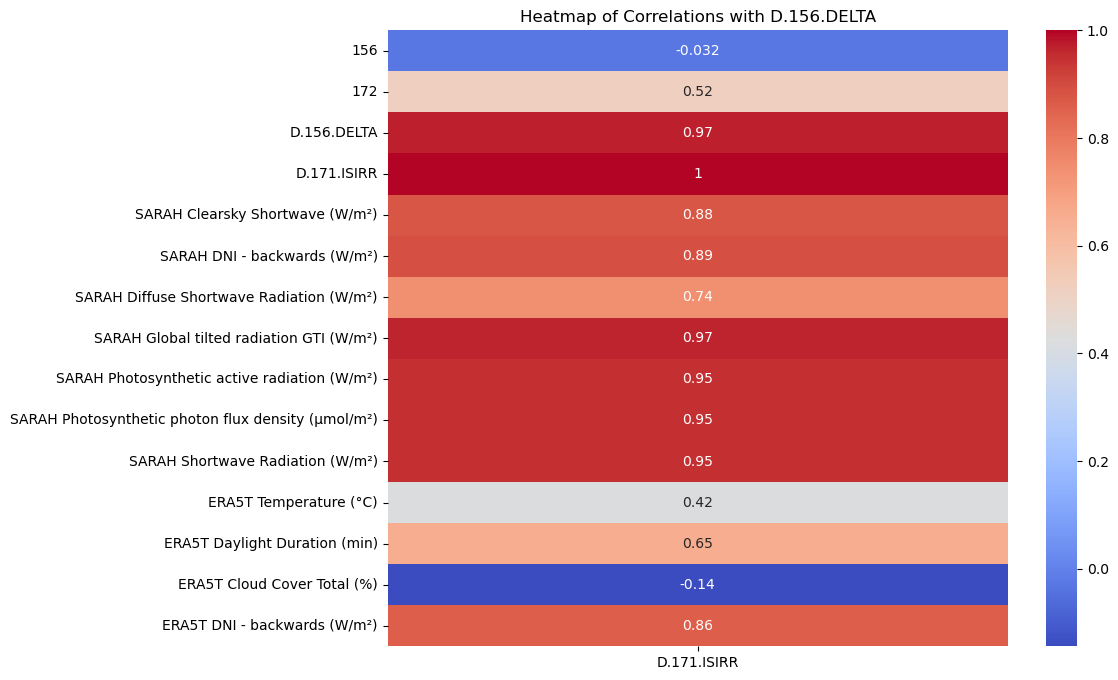

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the column exists in the DataFrame
if 'D.171.ISIRR' in merged_df.columns:
    # Calculate correlations with 'D.156.DELTA'
    correlations = merged_df.corr()[['D.171.ISIRR']]  # Correlation of all columns with 'D.156.DELTA'
    
    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations, annot=True, cmap='coolwarm', cbar=True)
    plt.title("Heatmap of Correlations with D.156.DELTA")
    plt.show()
else:
    print("Column 'D.156.DELTA' not found in the DataFrame.")

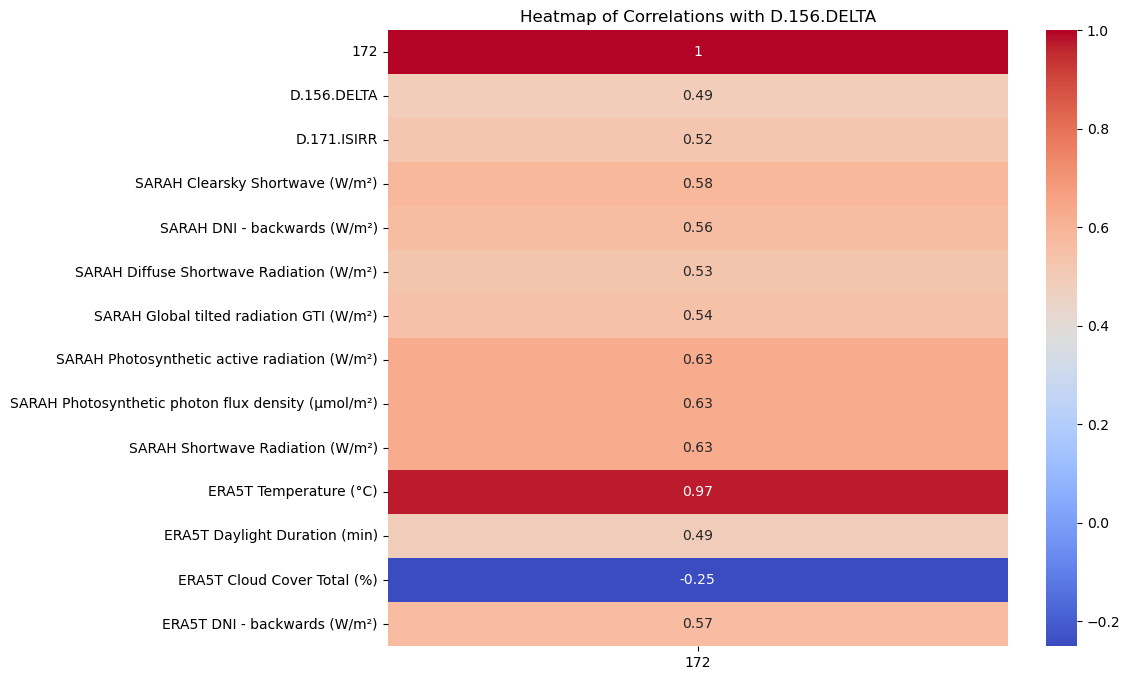

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the column exists in the DataFrame
if '172' in merged_df.columns:
    # Calculate correlations with 'D.156.DELTA'
    correlations = merged_df.corr()[['172']]  # Correlation of all columns with 'D.156.DELTA'
    
    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations, annot=True, cmap='coolwarm', cbar=True)
    plt.title("Heatmap of Correlations with D.156.DELTA")
    plt.show()
else:
    print("Column 'D.156.DELTA' not found in the DataFrame.")

/var/folders/f5/zvp8h0wn4d50th4gw1czk38m0000gn/T/ipykernel_7225/188233129.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exogenous = exogenous.fillna(method='ffill').fillna(method='bfill')  # Forward fill and backward fill
/var/folders/f5/zvp8h0wn4d50th4gw1czk38m0000gn/T/ipykernel_7225/188233129.py:30: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  exogenous = exogenous.fillna(method='ffill').fillna(method='bfill')  # Forward fill and backward fill
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._

Comparison of Actual and Forecasted Values:
                     Actual (Test)     Forecast
2025-05-15 00:00:00            0.0          NaN
2025-05-15 01:00:00            0.0          NaN
2025-05-15 02:00:00            0.0          NaN
2025-05-15 03:00:00           68.0          NaN
2025-05-15 04:00:00          324.0          NaN
2025-05-15 05:00:00         1136.0          NaN
2025-05-15 06:00:00         2032.0          NaN
2025-05-15 07:00:00         2652.0          NaN
2025-05-15 08:00:00         3156.0          NaN
2025-05-15 09:00:00         3108.0          NaN
2025-05-15 10:00:00         3416.0          NaN
2025-05-15 11:00:00         3304.0          NaN
2025-05-15 12:00:00         2984.0          NaN
2025-05-15 13:00:00         2412.0          NaN
2025-05-15 14:00:00         1564.0          NaN
2025-05-15 15:00:00          848.0          NaN
2025-05-15 16:00:00          172.0          NaN
2025-05-15 17:00:00            8.0          NaN
2025-05-15 18:00:00            0.0          

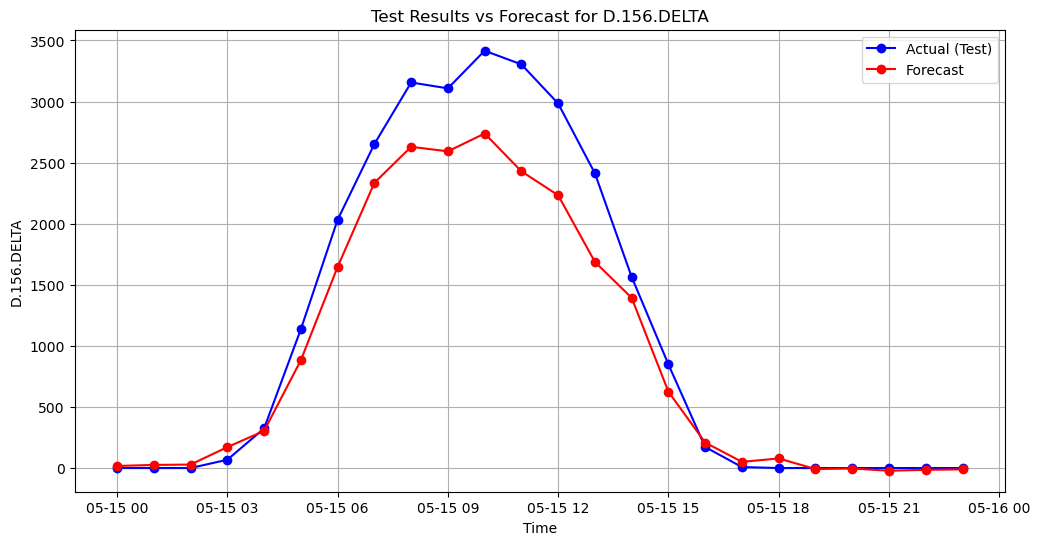

In [224]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Ensure 'D.156.DELTA' exists in the DataFrame
if 'D.156.DELTA' in merged_df.columns:
    # Prepare the data
    df = merged_df.copy()
    
    # Ensure the index is a datetime index
    df.index = pd.to_datetime(df.index)
    
    # Define the target variable and exogenous variables
    target = df['D.156.DELTA']  # Target variable
    exogenous = df[[
        "SARAH Clearsky Shortwave (W/m²)",
        "SARAH DNI - backwards (W/m²)",
        "SARAH Diffuse Shortwave Radiation (W/m²)",
        "SARAH Global tilted radiation GTI (W/m²)",
        "SARAH Photosynthetic active radiation (W/m²)",
        "SARAH Photosynthetic photon flux density (µmol/m²)",
        "SARAH Shortwave Radiation (W/m²)",
        "ERA5T Temperature (°C)",
        "ERA5T Daylight Duration (min)",
        "ERA5T Cloud Cover Total (%)",
        "ERA5T DNI - backwards (W/m²)"
    ]]  # Exogenous variables
    
    # Handle missing values in exogenous variables
    exogenous = exogenous.fillna(method='ffill').fillna(method='bfill')  # Forward fill and backward fill
    if exogenous.isnull().any().any():
        print("Warning: Missing values still exist in exogenous variables.")
    
    # Split into training and testing sets
    train_size = len(target) - 24  # Use all but the last 24 hours for training
    train_target = target[:train_size]
    test_target = target[train_size:]
    train_exogenous = exogenous[:train_size]
    test_exogenous = exogenous[train_size:]
    
    # Fit the SARIMAX model
    model = SARIMAX(train_target, exog=train_exogenous, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
    sarimax = model.fit(disp=False)
    
    # Forecast the next 24 hours
    forecast = sarimax.forecast(steps=24, exog=test_exogenous)
    
    # Combine actual (test) and forecasted values into a DataFrame
    comparison_df = pd.DataFrame({
        "Actual (Test)": test_target,
        "Forecast": forecast
    })
    
    # Print the combined DataFrame
    print("Comparison of Actual and Forecasted Values:")
    print(comparison_df)
    
    # Plot the test results vs forecasted values
    plt.figure(figsize=(12, 6))
    plt.plot(test_target.index, test_target, marker='o', color='blue', label='Actual (Test)')
    plt.plot(test_target.index, forecast, marker='o', color='red', label='Forecast')
    plt.title("Test Results vs Forecast for D.156.DELTA")
    plt.xlabel("Time")
    plt.ylabel("D.156.DELTA")
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("Column 'D.156.DELTA' not found in the DataFrame.")

In [26]:
import requests
import pandas as pd

# Define the API endpoint and parameters
url = "https://my.meteoblue.com/packages/basic-1h"
params = {
    "lat": 44.791225,  # Latitude
    "lon": 27.50663,  # Longitude
    "format": "json",  # JSON format
    "timeformat": "timestamp_utc",  # Time format in UTC (GMT)
    "forecast_days": 2,  # Number of forecast days
    "history_days": 4,  # Number of historical days
    "apikey": "BxCsIi1U6N8SoM3w"  # Your API key
}

# Make the API call
response = requests.get(url, params=params)

# Check the response status
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    
    # Extract relevant data into a DataFrame
    if "data_1h" in data and "time" in data["data_1h"]:
        # Create a DataFrame with UTC time
        df_solar = pd.DataFrame({
            "time_utc": pd.to_datetime(data["data_1h"]["time"], unit='s', utc=True),  # UTC time
            "temperature": data["data_1h"]["temperature"],  # Temperature
        })
        
        print("DataFrame with Historical and Forecast Solar Data in GMT/UTC:")
        print(df_solar.head(30))
    else:
        print("Required data fields are missing in the response.")
else:
    print(f"Failed to fetch data. HTTP Status Code: {response.status_code}")
    print(f"Response: {response.text}")

DataFrame with Historical and Forecast Solar Data in GMT/UTC:
                    time_utc  temperature
0  2025-06-16 21:00:00+00:00        19.96
1  2025-06-16 22:00:00+00:00        18.93
2  2025-06-16 23:00:00+00:00        17.94
3  2025-06-17 00:00:00+00:00        16.64
4  2025-06-17 01:00:00+00:00        15.87
5  2025-06-17 02:00:00+00:00        14.87
6  2025-06-17 03:00:00+00:00        15.37
7  2025-06-17 04:00:00+00:00        16.53
8  2025-06-17 05:00:00+00:00        19.60
9  2025-06-17 06:00:00+00:00        22.80
10 2025-06-17 07:00:00+00:00        25.73
11 2025-06-17 08:00:00+00:00        27.43
12 2025-06-17 09:00:00+00:00        28.53
13 2025-06-17 10:00:00+00:00        29.03
14 2025-06-17 11:00:00+00:00        29.53
15 2025-06-17 12:00:00+00:00        29.93
16 2025-06-17 13:00:00+00:00        30.37
17 2025-06-17 14:00:00+00:00        30.67
18 2025-06-17 15:00:00+00:00        30.60
19 2025-06-17 16:00:00+00:00        29.90
20 2025-06-17 17:00:00+00:00        28.03
21 2025-06-17 

In [27]:
import requests
import pandas as pd

# Define the API endpoint and parameters
url = "https://my.meteoblue.com/packages/pvpro-1h"
params = {
    "lat": 44.791225,  # Latitude
    "lon": 27.50663,  # Longitude
    "format": "json",  # JSON format
    "timeformat": "timestamp_utc",  # Time format in UTC (GMT)
    "forecast_days": 2,  # Number of forecast days
    "history_days": 4,  # Number of historical days
    "apikey": "BxCsIi1U6N8SoM3w"  # Your API key
}

# Make the API call
response = requests.get(url, params=params)

# Check the response status
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    
    # Extract relevant data into a DataFrame
    if "data_1h" in data and "time" in data["data_1h"]:
        # Create a DataFrame with UTC time
        df_solar = pd.DataFrame({
            "time_utc": pd.to_datetime(data["data_1h"]["time"], unit='s', utc=True),  # UTC time
            "gti_instant": data["data_1h"]["gti_instant"]  # GTI Instantaneous
        })
        
        print("DataFrame with Historical and Forecast Solar Data in GMT/UTC:")
        print(df_solar.head(30))
    else:
        print("Required data fields are missing in the response.")
else:
    print(f"Failed to fetch data. HTTP Status Code: {response.status_code}")
    print(f"Response: {response.text}")

Failed to fetch data. HTTP Status Code: 400
Response: {"error_message":"pv queries require kwp parameter","error":true}


In [324]:
data

{'metadata': {'modelrun_updatetime_utc': 1750235630,
  'name': '',
  'height': 30,
  'timezone_abbrevation': 'EEST',
  'latitude': 44.791225,
  'modelrun_utc': 1750235630,
  'longitude': 27.50663,
  'utc_timeoffset': 3.0,
  'generation_time_ms': 15.287995},
 'units': {'predictability': 'percent',
  'precipitation': 'mm',
  'windspeed': 'ms-1',
  'precipitation_probability': 'percent',
  'relativehumidity': 'percent',
  'temperature': 'C',
  'time': 'seconds since 1 January 1970 00:00 UTC',
  'pressure': 'hPa',
  'winddirection': 'degree'},
 'data_1h': {'time': [1749934800,
   1749938400,
   1749942000,
   1749945600,
   1749949200,
   1749952800,
   1749956400,
   1749960000,
   1749963600,
   1749967200,
   1749970800,
   1749974400,
   1749978000,
   1749981600,
   1749985200,
   1749988800,
   1749992400,
   1749996000,
   1749999600,
   1750003200,
   1750006800,
   1750010400,
   1750014000,
   1750017600,
   1750021200,
   1750024800,
   1750028400,
   1750032000,
   1750035600,


In [19]:
import requests
import pandas as pd

# Define the API endpoint and parameters
url = "https://my.meteoblue.com/packages/basic-1h_basic-day"
params = {
    "lat": 44.791225,  # Latitude
    "lon": 27.50663,  # Longitude
    "format": "json",  # JSON format
    "temperature": "C",  # Temperature in Celsius
    "timeformat": "timestamp_utc",  # Time format in UTC (GMT)
    "forecast_days": 2,  # Number of forecast days
    "history_days": 3,  # Number of historical days
    "apikey": "BxCsIi1U6N8SoM3w"  # Your API key
}

# Make the API call
response = requests.get(url, params=params)

# Check the response status
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    
    # Extract all fields from data_1h into a DataFrame
    if "data_1h" in data and "time" in data["data_1h"]:
        # Convert timestamps to datetime
        timestamps = pd.to_datetime(data["data_1h"]["time"], unit='s', utc=True)
        
        # Create a DataFrame with all fields from data_1h
        df = pd.DataFrame(data["data_1h"])
        
        # Replace the 'time' column with formatted timestamps
        df["time"] = timestamps
        
        # Set 'time' as the index
        df.set_index("time", inplace=True)
        
        # Display the DataFrame
        print("DataFrame with all fields from data_1h:")
        print(df.head())
    else:
        print("Required data fields are missing in the response.")
else:
    print(f"Failed to fetch data. HTTP Status Code: {response.status_code}")
    print(f"Response: {response.text}")

DataFrame with all fields from data_1h:
                           snowfraction  windspeed  temperature  \
time                                                              
2025-06-17 21:00:00+00:00           0.0       4.23        21.10   
2025-06-17 22:00:00+00:00           0.0       4.13        20.77   
2025-06-17 23:00:00+00:00           0.0       4.28        20.34   
2025-06-18 00:00:00+00:00           0.0       3.36        19.77   
2025-06-18 01:00:00+00:00           0.0       2.82        19.03   

                           precipitation_probability  \
time                                                   
2025-06-17 21:00:00+00:00                          7   
2025-06-17 22:00:00+00:00                          7   
2025-06-17 23:00:00+00:00                          7   
2025-06-18 00:00:00+00:00                          7   
2025-06-18 01:00:00+00:00                          0   

                           convective_precipitation  \
time                                      

In [343]:
df3

,snowfraction,windspeed,temperature,precipitation_probability,convective_precipitation,rainspot,pictocode,felttemperature,precipitation,isdaylight,uvindex,relativehumidity,sealevelpressure,winddirection
2025-06-14 21:00:00,0.0,2.38,13.10,0,0.0,0000000000000000000000000000000000000000000000000,13,12.42,0.0,0,0,100,1019.06,328
2025-06-14 22:00:00,0.0,2.47,12.43,0,0.0,0000000000000000000000000000000000000000000000000,13,11.36,0.0,0,0,97,1019.12,330
2025-06-14 23:00:00,0.0,2.40,11.93,0,0.0,0000000000000000000000000000000000000000000000000,13,10.73,0.0,0,0,97,1019.18,329
2025-06-15 00:00:00,0.0,2.36,11.57,0,0.0,0000000000000000000000000000000000000000000000000,13,10.29,0.0,0,0,97,1019.24,326
2025-06-15 01:00:00,0.0,2.49,11.33,0,0.0,0000000000000000000000000000000000000000000000000,13,9.83,0.0,0,0,96,1019.20,329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-19 17:00:00,0.0,2.27,30.05,0,0.0,0000000000000000000000000000000000000000000000000,6,29.62,0.0,1,0,36,1012.08,280
2025-06-19 18:00:00,0.0,1.72,27.99,0,0.0,0000000000000000000000000000000000000000000000000,6,27.99,0.0,1,0,41,1012.09,283
2025-06-19 19:00:00,0.0,1.62,26.01,0,0.0,0000000000000000000000000000000000000000000000000,9,26.08,0.0,0,0,46,1012.26,294
2025-06-19 20:00:00,0.0,1.83,24.34,0,0.0,0000000000000000000000000000000000000000000000000,8,24.20,0.0,0,0,51,1012.42,301


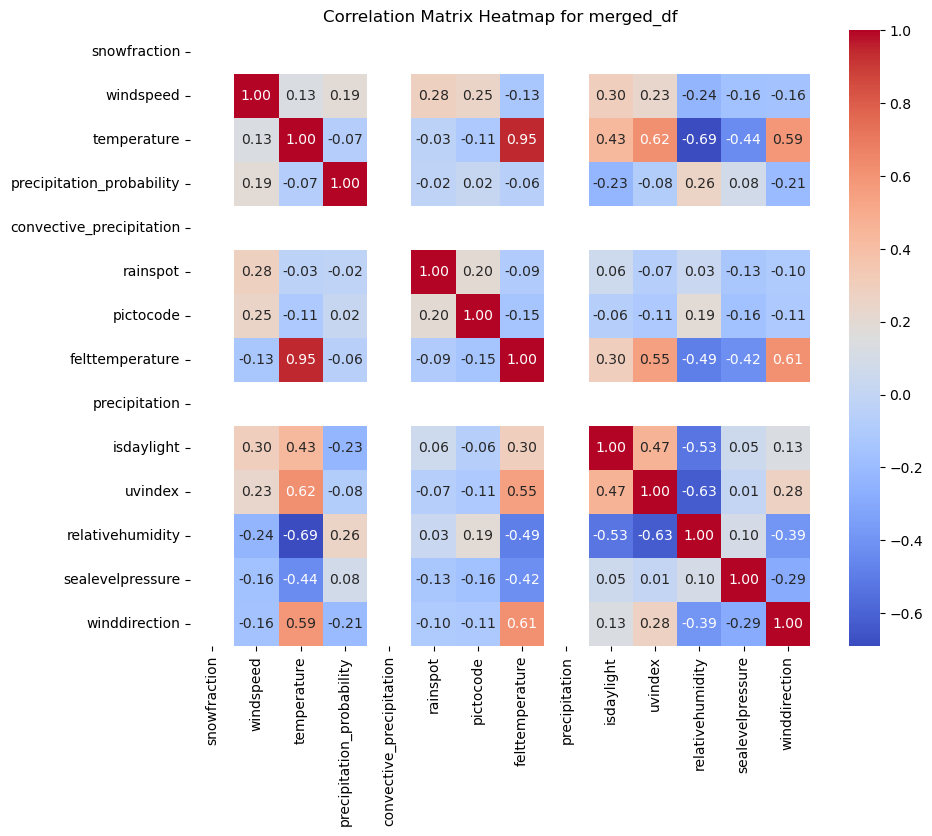

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for all numeric columns in merged_df
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap for merged_df")
plt.show()

In [17]:
# Select the columns "D.171.ISIRR" and "gti_instant" from merged_df
selected_columns = merged_df[["D.171.ISIRR", "gti_instant"]]

# Display the selected columns
print(selected_columns.head())

KeyError: "['gti_instant'] not in index"

In [355]:
merged_df.head(30)

,snowfraction,windspeed,temperature,precipitation_probability,convective_precipitation,rainspot,pictocode,felttemperature,precipitation,isdaylight,uvindex,relativehumidity,sealevelpressure,winddirection,156,172,D.156.DELTA,D.171.ISIRR
2025-06-14 21:00:00,0.0,2.38,13.10,0,0.0,0000000000000000000000000000000000000000000000000,13,12.42,0.0,0,0,100,1019.06,328,65362588.0,14.382,0.0,2.406
2025-06-14 22:00:00,0.0,2.47,12.43,0,0.0,0000000000000000000000000000000000000000000000000,13,11.36,0.0,0,0,97,1019.12,330,65362588.0,13.850,0.0,2.392
2025-06-14 23:00:00,0.0,2.40,11.93,0,0.0,0000000000000000000000000000000000000000000000000,13,10.73,0.0,0,0,97,1019.18,329,65362588.0,13.300,0.0,2.399
2025-06-15 00:00:00,0.0,2.36,11.57,0,0.0,0000000000000000000000000000000000000000000000000,13,10.29,0.0,0,0,97,1019.24,326,65362588.0,12.924,0.0,2.392
2025-06-15 01:00:00,0.0,2.49,11.33,0,0.0,0000000000000000000000000000000000000000000000000,13,9.83,0.0,0,0,96,1019.20,329,65362588.0,12.767,0.0,2.397
2025-06-15 02:00:00,0.0,2.49,11.00,0,0.0,0000000000000000000000000000000000000000000000000,13,9.34,0.0,1,0,95,1019.15,329,65362592.0,12.957,4.0,8.807
2025-06-15 03:00:00,0.0,2.39,10.59,0,0.0,0000000000000000000000000000000000000000000000000,13,8.97,0.0,1,0,96,1019.11,331,65362704.0,14.329,112.0,48.054
2025-06-15 04:00:00,0.0,2.32,12.40,0,0.0,0000000000000000000000000000000000000000000000000,13,10.94,0.0,1,0,88,1019.24,333,65363072.0,18.989,368.0,148.381
2025-06-15 05:00:00,0.0,3.15,15.07,0,0.0,0000000000000000000000000000000000000000000000000,1,13.11,0.0,1,0,75,1019.36,336,65364224.0,24.050,1152.0,346.057
2025-06-15 06:00:00,0.0,4.35,18.17,0,0.0,0000000000000000000000000000000000000000000000000,1,15.37,0.0,1,1,62,1019.49,345,65366016.0,24.338,1792.0,548.543


In [354]:
# Sort features by correlation with D.156.DELTA
correlation_with_target = merged_df.corr()["D.156.DELTA"].sort_values(ascending=False)

# Display the correlation values
print("Correlation with D.156.DELTA:")
print(correlation_with_target)

# Keep features with strong correlation
strong_features = correlation_with_target[(correlation_with_target > 0.5) | (correlation_with_target < -0.5)]
print("\nStrongly Correlated Features with D.156.DELTA:")
print(strong_features)


Correlation with D.156.DELTA:
D.156.DELTA                  1.000000
D.171.ISIRR                  0.997587
uvindex                      0.895480
windspeed                    0.871105
172                          0.688227
winddirection                0.645590
isdaylight                   0.590565
temperature                  0.577411
felttemperature              0.504701
156                          0.054781
sealevelpressure             0.036891
pictocode                   -0.343979
relativehumidity            -0.659460
snowfraction                      NaN
precipitation_probability         NaN
convective_precipitation          NaN
rainspot                          NaN
precipitation                     NaN
Name: D.156.DELTA, dtype: float64

Strongly Correlated Features with D.156.DELTA:
D.156.DELTA         1.000000
D.171.ISIRR         0.997587
uvindex             0.895480
windspeed           0.871105
172                 0.688227
winddirection       0.645590
isdaylight          0.590565
t

In [352]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure both DataFrames have properly formatted indices
D_156_DELTA.index = pd.to_datetime(D_156_DELTA.index)  # Convert D.156.DELTA index to datetime
merged_df.index = pd.to_datetime(merged_df.index)      # Ensure merged_df index is datetime

# Merge merged_df and D.156.DELTA on the index
combined_df = pd.merge(merged_df, D_156_DELTA, left_index=True, right_index=True, how="inner")

# Calculate the correlation matrix
corr_matrix = combined_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

NameError: name 'D_156_DELTA' is not defined

In [350]:
df.tail(50)

,156,172,D.156.DELTA,D.171.ISIRR
2025-06-14 22:00:00,65362588.0,13.850,0.0,2.392
2025-06-14 23:00:00,65362588.0,13.300,0.0,2.399
2025-06-15 00:00:00,65362588.0,12.924,0.0,2.392
2025-06-15 01:00:00,65362588.0,12.767,0.0,2.397
2025-06-15 02:00:00,65362592.0,12.957,4.0,8.807
2025-06-15 03:00:00,65362704.0,14.329,112.0,48.054
2025-06-15 04:00:00,65363072.0,18.989,368.0,148.381
2025-06-15 05:00:00,65364224.0,24.050,1152.0,346.057
2025-06-15 06:00:00,65366016.0,24.338,1792.0,548.543
2025-06-15 07:00:00,65368408.0,25.402,2392.0,742.287


In [348]:
# Merge df3 and df on the index
merged_df = pd.merge(df3, df, left_index=True, right_index=True, how="left")

# Display the merged DataFrame
print("Merged DataFrame:")
print(merged_df.head50))

SyntaxError: unmatched ')' (1949923382.py, line 6)

In [349]:
print(merged_df.head(50))

                     snowfraction  windspeed  temperature  \
2025-06-14 21:00:00           0.0       2.38        13.10   
2025-06-14 22:00:00           0.0       2.47        12.43   
2025-06-14 23:00:00           0.0       2.40        11.93   
2025-06-15 00:00:00           0.0       2.36        11.57   
2025-06-15 01:00:00           0.0       2.49        11.33   
2025-06-15 02:00:00           0.0       2.49        11.00   
2025-06-15 03:00:00           0.0       2.39        10.59   
2025-06-15 04:00:00           0.0       2.32        12.40   
2025-06-15 05:00:00           0.0       3.15        15.07   
2025-06-15 06:00:00           0.0       4.35        18.17   
2025-06-15 07:00:00           0.0       5.24        20.70   
2025-06-15 08:00:00           0.0       5.13        22.27   
2025-06-15 09:00:00           0.0       4.80        23.27   
2025-06-15 10:00:00           0.0       4.67        23.90   
2025-06-15 11:00:00           0.0       4.34        24.40   
2025-06-15 12:00:00     

In [332]:
df2

,time_utc,temperature
0,2025-06-14 21:00:00+00:00,13.10
1,2025-06-14 22:00:00+00:00,12.43
2,2025-06-14 23:00:00+00:00,11.93
3,2025-06-15 00:00:00+00:00,11.57
4,2025-06-15 01:00:00+00:00,11.33
...,...,...
116,2025-06-19 17:00:00+00:00,30.05
117,2025-06-19 18:00:00+00:00,27.99
118,2025-06-19 19:00:00+00:00,26.01
119,2025-06-19 20:00:00+00:00,24.34


In [326]:
import requests
import pandas as pd

# Define the API endpoint and parameters
url = "https://my.meteoblue.com/packages/basic-1h_basic-day"
params = {
    "lat": 44.791225,  # Latitude
    "lon": 27.50663,  # Longitude
    "format": "json",  # JSON format
    "temperature": "C",  # Temperature in Celsius
    "timeformat": "timestamp_utc",  # Time format in UTC (GMT)
    "forecast_days": 2,  # Number of forecast days
    "history_days": 3,  # Number of historical days
    "apikey": "BxCsIi1U6N8SoM3w"  # Your API key
}

# Make the API call
response = requests.get(url, params=params)

# Check the response status
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    
    # Extract relevant data into a DataFrame
    if "data_1h" in data and "time" in data["data_1h"]:
        # Convert timestamps to datetime
        timestamps = pd.to_datetime(data["data_1h"]["time"], unit='s', utc=True)
        
        # Ensure all arrays are of the same length
        def pad_or_fill(key):
            return data["data_1h"].get(key, [None] * len(timestamps))
        
        # Create a DataFrame with the specified fields
        df2 = pd.DataFrame({
            "time_utc": timestamps,
            "temperature_instant": pad_or_fill("temperature_instant"),
            "precipitation": pad_or_fill("precipitation"),
            "predictability": pad_or_fill("predictability"),
            "temperature_max": pad_or_fill("temperature_max"),
            "sealevelpressure_mean": pad_or_fill("sealevelpressure_mean"),
            "windspeed_mean": pad_or_fill("windspeed_mean"),
            "precipitation_hours": pad_or_fill("precipitation_hours"),
            "sealevelpressure_min": pad_or_fill("sealevelpressure_min"),
            "pictocode": pad_or_fill("pictocode"),
            "snowfraction": pad_or_fill("snowfraction"),
            "humiditygreater90_hours": pad_or_fill("humiditygreater90_hours"),
            "convective_precipitation": pad_or_fill("convective_precipitation"),
            "relativehumidity_max": pad_or_fill("relativehumidity_max"),
            "temperature_min": pad_or_fill("temperature_min"),
            "winddirection": pad_or_fill("winddirection"),
            "felttemperature_max": pad_or_fill("felttemperature_max"),
            "indexto1hvalues_end": pad_or_fill("indexto1hvalues_end"),
            "relativehumidity_min": pad_or_fill("relativehumidity_min"),
            "felttemperature_mean": pad_or_fill("felttemperature_mean"),
            "windspeed_min": pad_or_fill("windspeed_min"),
            "felttemperature_min": pad_or_fill("felttemperature_min"),
            "precipitation_probability": pad_or_fill("precipitation_probability"),
            "uvindex": pad_or_fill("uvindex"),
            "indexto1hvalues_start": pad_or_fill("indexto1hvalues_start"),
            "rainspot": pad_or_fill("rainspot"),
            "temperature_mean": pad_or_fill("temperature_mean"),
            "sealevelpressure_max": pad_or_fill("sealevelpressure_max"),
            "relativehumidity_mean": pad_or_fill("relativehumidity_mean"),
            "predictability_class": pad_or_fill("predictability_class"),
            "windspeed_max": pad_or_fill("windspeed_max")
        })
        
        print("DataFrame with Hourly Data:")
        print(df2.head())
    else:
        print("Required data fields are missing in the response.")
else:
    print(f"Failed to fetch data. HTTP Status Code: {response.status_code}")
    print(f"Response: {response.text}")

DataFrame with Hourly Data:
                   time_utc temperature_instant  precipitation predictability  \
0 2025-06-14 21:00:00+00:00                None            0.0           None   
1 2025-06-14 22:00:00+00:00                None            0.0           None   
2 2025-06-14 23:00:00+00:00                None            0.0           None   
3 2025-06-15 00:00:00+00:00                None            0.0           None   
4 2025-06-15 01:00:00+00:00                None            0.0           None   

  temperature_max sealevelpressure_mean windspeed_mean precipitation_hours  \
0            None                  None           None                None   
1            None                  None           None                None   
2            None                  None           None                None   
3            None                  None           None                None   
4            None                  None           None                None   

  sealevelpressu

In [328]:
# Remove columns where all values are None or NaN
df2 = df2.dropna(axis=1, how='all')

# Display the updated DataFrame
print("Updated DataFrame after removing columns with all None/NaN values:")
print(df2.head())

Updated DataFrame after removing columns with all None/NaN values:
                   time_utc  precipitation  pictocode  snowfraction  \
0 2025-06-14 21:00:00+00:00            0.0         13           0.0   
1 2025-06-14 22:00:00+00:00            0.0         13           0.0   
2 2025-06-14 23:00:00+00:00            0.0         13           0.0   
3 2025-06-15 00:00:00+00:00            0.0         13           0.0   
4 2025-06-15 01:00:00+00:00            0.0         13           0.0   

   convective_precipitation  winddirection  precipitation_probability  \
0                       0.0            328                          0   
1                       0.0            330                          0   
2                       0.0            329                          0   
3                       0.0            326                          0   
4                       0.0            329                          0   

   uvindex                                           rainspot  
0  

In [322]:
# Set time_utc as the index
df2.set_index("time_utc", inplace=True)

# Format the index to the desired format (YYYY-MM-DD HH:MM:SS)
df2.index = df2.index.strftime("%Y-%m-%d %H:%M:%S")

# Remove the index name
df2.index.name = None

# Display the updated DataFrame
print("Updated DataFrame:")
print(df2.head(40))

Updated DataFrame:
                     temperature_instant  precipitation  predictability  \
2025-06-15 03:00:00                13.10            0.0              83   
2025-06-16 03:00:00                16.03            0.0              87   
2025-06-17 03:00:00                20.70            0.0              83   
2025-06-18 03:00:00                21.23            0.0              81   
2025-06-19 03:00:00                22.16            0.0              86   

                     temperature_max  sealevelpressure_mean  windspeed_mean  \
2025-06-15 03:00:00            26.03                   1017            3.14   
2025-06-16 03:00:00            28.83                   1015            2.46   
2025-06-17 03:00:00            30.70                   1016            2.89   
2025-06-18 03:00:00            29.72                   1019            2.13   
2025-06-19 03:00:00            33.00                   1015            2.49   

                     precipitation_hours  sealevelpress

In [319]:
df.tail(20)

,156,172,D.156.DELTA,D.171.ISIRR
2025-06-16 04:00:00,65385844.0,22.848,356.0,147.471
2025-06-16 05:00:00,65386944.0,27.655,1100.0,336.873
2025-06-16 06:00:00,65388660.0,27.506,1716.0,537.990
2025-06-16 07:00:00,65390976.0,28.388,2316.0,721.264
2025-06-16 08:00:00,65394008.0,29.568,3032.0,877.821
2025-06-16 09:00:00,65397004.0,30.048,2996.0,972.227
2025-06-16 10:00:00,65400088.0,30.980,3084.0,1008.926
2025-06-16 11:00:00,65403048.0,31.849,2960.0,972.272
2025-06-16 12:00:00,65405992.0,32.648,2944.0,877.337
2025-06-16 13:00:00,65408056.0,33.014,2064.0,668.225


In [318]:
# Merge the two DataFrames on the index
merged_df = pd.merge(df, df2, left_index=True, right_index=True, how="outer")

# Display the merged DataFrame
print("Merged DataFrame:")
print(merged_df.head())

Merged DataFrame:
                            156    172  D.156.DELTA  D.171.ISIRR  \
2022-03-18 07:00:00  47487776.0  3.226        440.0      675.620   
2022-03-18 08:00:00  47491120.0  4.607       3344.0      836.143   
2022-03-18 09:00:00  47494692.0  5.690       3572.0      939.744   
2022-03-18 10:00:00  47498144.0  6.827       3452.0      972.460   
2022-03-18 11:00:00  47501184.0  7.632       3040.0      792.876   

                     temperature_instant  precipitation  predictability  \
2022-03-18 07:00:00                  NaN            NaN             NaN   
2022-03-18 08:00:00                  NaN            NaN             NaN   
2022-03-18 09:00:00                  NaN            NaN             NaN   
2022-03-18 10:00:00                  NaN            NaN             NaN   
2022-03-18 11:00:00                  NaN            NaN             NaN   

                     temperature_max  sealevelpressure_mean  windspeed_mean  \
2022-03-18 07:00:00              NaN       

In [286]:
# Ensure time_utc is set as the index in df2
try:
    # Convert time_utc to the desired format and set it as the index
    df2["time_utc"] = pd.to_datetime(df2["time_utc"])  # Ensure it's in datetime format
    df2.set_index("time_utc", inplace=True)  # Set time_utc as the index
    
    # Ensure the index format matches the desired format
    df2.index = df2.index.strftime("%Y-%m-%d %H:%M:%S")  # Format the index as a string
    
    print("Updated df2 with time_utc as the index:")
    print(df2.head())
except Exception as e:
    print(f"Error updating df2 index: {e}")

Updated df2 with time_utc as the index:
                     temperature
time_utc                        
2025-06-13 21:00:00        14.80
2025-06-13 22:00:00        14.31
2025-06-13 23:00:00        13.51
2025-06-14 00:00:00        13.04
2025-06-14 01:00:00        12.37


In [294]:
import requests
import pandas as pd

# Define the API endpoint and parameters for solar data
url = "https://my.meteoblue.com/packages/solar-1h_solar-day"
params = {
    "lat": 44.791225,  # Latitude
    "lon": 27.50663,  # Longitude
    "format": "json",  # JSON format
    "temperature": "C",  # Temperature in Celsius
    "timeformat": "timestamp_utc",  # Time format in UTC (GMT)
    "forecast_days": 2,  # Number of forecast days
    "history_days": 3,  # Number of historical days
    "apikey": "BxCsIi1U6N8SoM3w"  # Your API key
}

# Make the API call
response = requests.get(url, params=params)

# Check the response status
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    
    # Extract hourly data (data_1h)
    if "data_1h" in data:
        data_1h = data["data_1h"]
        
        # Convert timestamps to datetime
        timestamps = pd.to_datetime(data_1h["time"], unit="s", utc=True)
        
        # Ensure all arrays are of the same length
        def pad_or_fill(key):
            return data_1h.get(key, [None] * len(timestamps))
        
        # Create a DataFrame for backwards data
        hourly_df = pd.DataFrame({
            "time_utc": timestamps,
            "ghi_backwards": pad_or_fill("ghi_backwards"),
            "gni_backwards": pad_or_fill("gni_backwards"),
            "dir_backwards": pad_or_fill("dir_backwards"),
            "dni_backwards": pad_or_fill("dni_backwards"),
            "dif_backwards": pad_or_fill("dif_backwards"),
            "clearskyshortwave_backwards": pad_or_fill("clearskyshortwave_backwards"),
            "extraterrestrialradiation_backwards": pad_or_fill("extraterrestrialradiation_backwards")
        })
        
        # Set time_utc as the index
        hourly_df.set_index("time_utc", inplace=True)
        
        # Display the DataFrame
        print("Hourly Backwards DataFrame:")
        print(hourly_df)
    else:
        print("Hourly data ('data_1h') not found in the response.")
else:
    print(f"Failed to fetch data. HTTP Status Code: {response.status_code}")
    print(f"Response: {response.text}")

Hourly Backwards DataFrame:
                           ghi_backwards  gni_backwards dir_backwards  \
time_utc                                                                
2025-06-13 21:00:00+00:00           0.00           0.00          None   
2025-06-13 22:00:00+00:00           0.00           0.00          None   
2025-06-13 23:00:00+00:00           0.00           0.00          None   
2025-06-14 00:00:00+00:00           0.00           0.00          None   
2025-06-14 01:00:00+00:00           0.00           0.00          None   
...                                  ...            ...           ...   
2025-06-18 17:00:00+00:00         145.07         517.04          None   
2025-06-18 18:00:00+00:00          25.64         163.51          None   
2025-06-18 19:00:00+00:00           0.00           0.00          None   
2025-06-18 20:00:00+00:00           0.00           0.00          None   
2025-06-18 21:00:00+00:00           0.00           0.00          None   

                      

In [296]:
# Ensure both DataFrames have timezone-aware indices
df.index = df.index.tz_localize("UTC")  # Convert df's index to UTC if it is timezone-naive

# Merge the two DataFrames on the `time_utc` index
merged_df = pd.merge(df, hourly_df, left_index=True, right_index=True, how="inner")

# Display the merged DataFrame
print("Merged DataFrame:")
print(merged_df)

Merged DataFrame:
                                  156     172  D.156.DELTA  D.171.ISIRR  \
2025-06-13 21:00:00+00:00  65344524.0  18.081          0.0        2.470   
2025-06-13 22:00:00+00:00  65344524.0  15.879          0.0        2.453   
2025-06-13 23:00:00+00:00  65344524.0  15.877          0.0        2.427   
2025-06-14 00:00:00+00:00  65344524.0  15.575          0.0        2.414   
2025-06-14 01:00:00+00:00  65344524.0  14.456          0.0        2.392   
...                               ...     ...          ...          ...   
2025-06-16 19:00:00+00:00  65410748.0  20.616          0.0        2.483   
2025-06-16 20:00:00+00:00  65410748.0  19.855          0.0        2.483   
2025-06-16 21:00:00+00:00  65410748.0  19.347          0.0        2.475   
2025-06-16 22:00:00+00:00  65410748.0  20.022          0.0        2.473   
2025-06-16 23:00:00+00:00  65410748.0  18.343          0.0        2.480   

                           ghi_backwards  gni_backwards dir_backwards  \
2025-06-

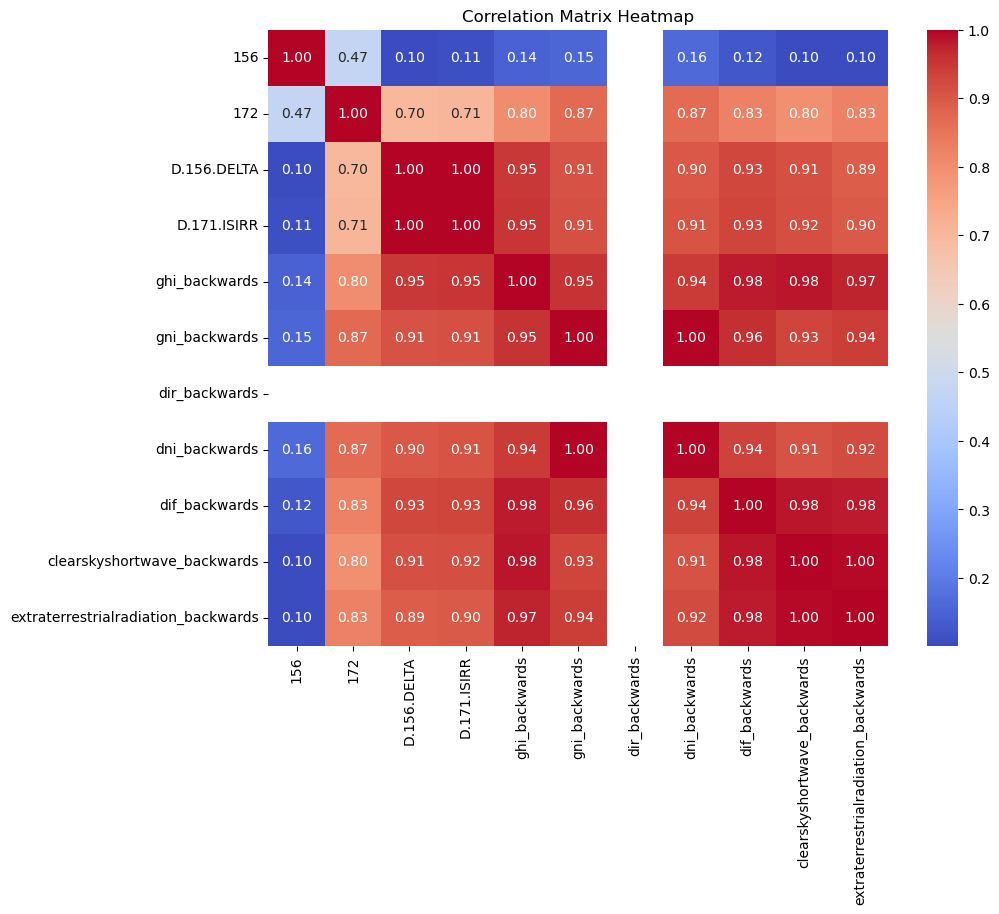

In [298]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `combined_df` is already created
# Calculate the correlation matrix
corr_matrix = merged_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [292]:
data

{'metadata': {'modelrun_updatetime_utc': 1750190293,
  'name': '',
  'height': 30,
  'timezone_abbrevation': 'EEST',
  'latitude': 44.791225,
  'modelrun_utc': 1750190293,
  'longitude': 27.50663,
  'utc_timeoffset': 3.0,
  'generation_time_ms': 15.6879425},
 'units': {'radiationtotal': 'Whm-2',
  'time': 'seconds since 1 January 1970 00:00 UTC',
  'radiation': 'Wm-2'},
 'data_1h': {'time': [1749848400,
   1749852000,
   1749855600,
   1749859200,
   1749862800,
   1749866400,
   1749870000,
   1749873600,
   1749877200,
   1749880800,
   1749884400,
   1749888000,
   1749891600,
   1749895200,
   1749898800,
   1749902400,
   1749906000,
   1749909600,
   1749913200,
   1749916800,
   1749920400,
   1749924000,
   1749927600,
   1749931200,
   1749934800,
   1749938400,
   1749942000,
   1749945600,
   1749949200,
   1749952800,
   1749956400,
   1749960000,
   1749963600,
   1749967200,
   1749970800,
   1749974400,
   1749978000,
   1749981600,
   1749985200,
   1749988800,
   17499

In [261]:
merged_df

,156,172,D.156.DELTA,D.171.ISIRR,time_utc,temperature,felttemperature,isdaylight


In [256]:
merged_df.tail(20)

,172,D.156.DELTA,D.171.ISIRR,SARAH Clearsky Shortwave (W/m²),SARAH DNI - backwards (W/m²),SARAH Diffuse Shortwave Radiation (W/m²),SARAH Global tilted radiation GTI (W/m²),SARAH Photosynthetic active radiation (W/m²),SARAH Photosynthetic photon flux density (µmol/m²),SARAH Shortwave Radiation (W/m²),ERA5T Temperature (°C),ERA5T Daylight Duration (min),ERA5T Cloud Cover Total (%),ERA5T DNI - backwards (W/m²)
2025-05-15 04:00:00,14.102,324.0,141.452,120.0,379.0,56.0,49.291645,59.52,272.0064,124.0,8.54,60.0,0.0,261.12726
2025-05-15 05:00:00,20.366,1136.0,348.778,293.0,534.0,106.0,173.89743,140.64,642.7248,293.0,11.34,60.0,0.0,477.35013
2025-05-15 06:00:00,19.520,2032.0,579.593,475.0,654.0,138.0,403.12064,228.0,1041.9601,475.0,13.91,60.0,2.1,630.77893
2025-05-15 07:00:00,22.303,2652.0,762.296,643.0,731.0,160.0,628.91003,308.63998,1410.4847,643.0,16.51,60.0,6.0,707.9176
2025-05-15 08:00:00,24.536,3156.0,927.823,781.0,781.0,173.0,821.25696,374.88,1713.2017,781.0,19.3,60.0,2.4,776.0994
2025-05-15 09:00:00,26.120,3108.0,1018.763,876.0,811.0,181.0,951.4966,420.47998,1921.5936,876.0,20.77,60.0,11.400001,812.85394
2025-05-15 10:00:00,26.946,3416.0,1043.805,920.0,823.0,184.0,1017.6769,441.59998,2018.1119,920.0,21.75,60.0,8.400001,835.7575
2025-05-15 11:00:00,27.446,3304.0,1002.762,909.0,820.0,183.0,1007.39386,436.31998,1993.9824,909.0,22.38,60.0,11.0,608.8666
2025-05-15 12:00:00,28.014,2984.0,891.394,844.0,801.0,178.0,922.10736,405.12,1851.3984,844.0,23.21,60.0,23.0,559.31665
2025-05-15 13:00:00,28.200,2412.0,708.927,730.0,764.0,168.0,776.68164,350.4,1601.328,730.0,23.55,60.0,3.0,558.6468


In [ ]:
import requests

# Define the API endpoint and parameters
url = "https://my.meteoblue.com/packages/basic-1h_basic-day"
params = {
    "lat": 47.558,  # Latitude
    "lon": 7.573,   # Longitude
    "apikey": "BxCsIi1U6N8SoM3w"  # Your API key
}

# Make the API call
response = requests.get(url, params=params)

# Check the response status
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    print("API Response:")
    print(data)
else:
    print(f"Failed to fetch data. HTTP Status Code: {response.status_code}")
    print(f"Response: {response.text}")

In [173]:
import requests
import pandas as pd
import json

# Define the API URL
url = "https://my.meteoblue.com/packages/multimodel-1h?apikey=BxCsIi1U6N8SoM3w&lat=44.791225&lon=27.506639&asl=925&format=json&tz=GMT&forecast_days=7&history_days=4"

# Make the GET request to the API
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    
    # Save the response to a JSON file
    with open("api_response.json", "w") as json_file:
        json.dump(data, json_file, indent=4)
    
    print("API response saved to 'api_response.json'")
    
    # Load the JSON into a DataFrame
    if "data" in data:
        # Flatten the 'data' key into a DataFrame
        df = pd.json_normalize(data["data"])
        print("Data DataFrame:")
        print(df.head())
    elif "metadata" in data:
        # Flatten the 'metadata' key into a DataFrame
        metadata_df = pd.DataFrame.from_dict(data["metadata"], orient='index', columns=['Value']).reset_index()
        metadata_df.columns = ['Key', 'Value']
        print("Metadata DataFrame:")
        print(metadata_df)
    else:
        print("Neither 'data' nor 'metadata' keys are present in the response.")
else:
    print(f"Failed to fetch data. HTTP Status Code: {response.status_code}")
    print("Response:", response.text)

API response saved to 'api_response.json'
Metadata DataFrame:
                        Key                                              Value
0   modelrun_updatetime_utc                                   2025-06-16 21:09
1                      name                                                   
2                    height                                                925
3      timezone_abbrevation                                                GMT
4                  latitude                                          44.791225
5              modelrun_utc  [2025-06-16 12:00, 2025-06-16 12:00, 2025-06-1...
6                    models  [NEMS4, NEMS12, NEMSGLOBAL, NEMS12_E, NEMSGLOB...
7        gridpointelevation  [22, 22, 19, 22, 19, 25, 34, 21, 37, 12, 19, 2...
8                 longitude                                           27.50664
9            utc_timeoffset                                                0.0
10       generation_time_ms                                          

In [174]:
metadata_df

,Key,Value
0,modelrun_updatetime_utc,2025-06-16 21:09
1,name,
2,height,925
3,timezone_abbrevation,GMT
4,latitude,44.791225
5,modelrun_utc,"[2025-06-16 12:00, 2025-06-16 12:00, 2025-06-1..."
6,models,"[NEMS4, NEMS12, NEMSGLOBAL, NEMS12_E, NEMSGLOB..."
7,gridpointelevation,"[22, 22, 19, 22, 19, 25, 34, 21, 37, 12, 19, 2..."
8,longitude,27.50664
9,utc_timeoffset,0.0


In [175]:
import requests
import pandas as pd
import json

# Define the API URL and parameters
base_url = "https://my.meteoblue.com/history/point"
params = {
    "start": "2022-11-01",  # Start date
    "end": "2022-11-02",    # End date
    "lat": 44.791225 ,          # Latitude
    "lon": 27.506639 ,        # Longitude
    "variable": "temperature",  # Weather variable
    "domain": "ERA5T",      # Weather model domain
    "apikey": "YOUR_API_KEY"  # Replace with your actual API key
}

# Make the GET request
response = requests.get(base_url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    
    # Save the response to a JSON file
    with open("historical_weather.json", "w") as json_file:
        json.dump(data, json_file, indent=4)
    
    print("API response saved to 'historical_weather.json'")
    
    # Load the JSON into a DataFrame
    if "data" in data:
        df = pd.DataFrame(data["data"])
        print("Data DataFrame:")
        print(df.head())
    else:
        print("No 'data' key found in the response.")
else:
    print(f"Failed to fetch data. HTTP Status Code: {response.status_code}")
    print("Response:", response.text)

Failed to fetch data. HTTP Status Code: 403
Response: {"error_message":"Invalid API key","error":true}


In [156]:
# Convert all possible columns in df_filtered to numeric
df_filtered = df_filtered.apply(pd.to_numeric, errors="coerce")

# Display the updated DataFrame
print("DataFrame with Numeric Columns:")
print(df_filtered.head())

DataFrame with Numeric Columns:
                       172  D.156.DELTA  D.171.ISIRR  SARAH DNI - backwards  \
2022-03-18 07:00:00  3.226        440.0      675.620                    NaN   
2022-03-18 08:00:00  4.607       3344.0      836.143                  763.0   
2022-03-18 09:00:00  5.690       3572.0      939.744                  795.0   
2022-03-18 10:00:00  6.827       3452.0      972.460                  817.0   
2022-03-18 11:00:00  7.632       3040.0      792.876                  818.0   

                     SARAH Diffuse Shortwave Radiation  \
2022-03-18 07:00:00                                NaN   
2022-03-18 08:00:00                              142.0   
2022-03-18 09:00:00                              151.0   
2022-03-18 10:00:00                              156.0   
2022-03-18 11:00:00                              157.0   

                     SARAH Diffuse Shortwave Radiation@  \
2022-03-18 07:00:00                             0.00000   
2022-03-18 08:00:00       

In [164]:
# Drop columns where the entire column is NaN
df_filtered = df_filtered.dropna(axis=1, how="all")

# Display the updated DataFrame
print("DataFrame after dropping columns with all NaN values:")
print(df_filtered.head())

DataFrame after dropping columns with all NaN values:
                       172  D.156.DELTA  D.171.ISIRR  SARAH DNI - backwards  \
2022-03-18 07:00:00  3.226        440.0      675.620                    NaN   
2022-03-18 08:00:00  4.607       3344.0      836.143                  763.0   
2022-03-18 09:00:00  5.690       3572.0      939.744                  795.0   
2022-03-18 10:00:00  6.827       3452.0      972.460                  817.0   
2022-03-18 11:00:00  7.632       3040.0      792.876                  818.0   

                     SARAH Diffuse Shortwave Radiation  \
2022-03-18 07:00:00                                NaN   
2022-03-18 08:00:00                              142.0   
2022-03-18 09:00:00                              151.0   
2022-03-18 10:00:00                              156.0   
2022-03-18 11:00:00                              157.0   

                     SARAH Diffuse Shortwave Radiation@  \
2022-03-18 07:00:00                             0.00000   
2022

In [165]:
df_filtered.isna().sum()

172                                           0
D.156.DELTA                                   0
D.171.ISIRR                                   0
SARAH DNI - backwards                       186
SARAH Diffuse Shortwave Radiation           186
SARAH Diffuse Shortwave Radiation@            0
SARAH Direct Shortwave Radiation            186
SARAH Direct Shortwave Radiation@             0
SARAH Global tilted radiation GTI           186
SARAH Photosynthetic active radiation       186
SARAH Photosynthetic photon flux density    186
SARAH Shortwave Radiation                   186
NEMS4 Sunshine Duration                      36
NEMS4 Cloud Cover Total                      36
SARAH Clearsky Shortwave                    186
dtype: int64

In [158]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16359 entries, 2022-03-18 07:00:00 to 2024-01-29 06:00:00
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   172                                            16359 non-null  float64
 1   D.156.DELTA                                    16359 non-null  float64
 2   D.171.ISIRR                                    16359 non-null  float64
 3   SARAH DNI - backwards                          16173 non-null  float64
 4   SARAH Diffuse Shortwave Radiation              16173 non-null  float64
 5   SARAH Diffuse Shortwave Radiation@             16359 non-null  float64
 6   SARAH Direct Shortwave Radiation               16173 non-null  float64
 7   SARAH Direct Shortwave Radiation@              16359 non-null  float64
 8   SARAH Global tilted radiation GTI              16173 non-null  float64
 9   SARAH Photosynt

In [ ]:
import requests
import pandas as pd
import time
from datetime import datetime, timedelta

# API endpoint URLs
TREND_URL = f"{BASE_URL}/{PLANT_CODE}/data/trend/"
SENSORS_URL = f"{BASE_URL}/{PLANT_CODE}/sensors/{config_version}"

# Define the specific sensors to process
sensor_ids = ["timestamp", "D.171.ISIRR", "172", "D.156.DELTA"]

# Initialize an empty DataFrame
df = pd.DataFrame()

# Set both start_date and end_date to yesterday
yesterday = datetime.now() - timedelta(days=1)
start_date = yesterday.replace(hour=0, minute=0, second=0)  # Start of yesterday
end_date = yesterday.replace(hour=23, minute=59, second=59)  # End of yesterday

# Define the maximum interval for resolution 0
max_interval = timedelta(days=92)

# Split the time range into chunks of the maximum interval
time_ranges = []
current_start = start_date
while current_start < end_date:
    current_end = min(current_start + max_interval, end_date)
    time_ranges.append((current_start, current_end))
    current_start = current_end + timedelta(seconds=1)  # Avoid overlapping intervals

# Initialize a list to store all sensor data
all_data = []

# Loop through each time range
for time_idx, (start_time, end_time) in enumerate(time_ranges):
    print(f"Processing time range {time_idx + 1}: {start_time} to {end_time}")
    payload = {
        "from": start_time.strftime("%Y-%m-%d %H:%M:%S"),
        "to": end_time.strftime("%Y-%m-%d %H:%M:%S"),
        "sensors": sensor_ids,
        "resolution": RESOLUTION  # Use the selected resolution
    }

    # Make the POST request to the API
    response = requests.post(TREND_URL, headers=HEADERS, json=payload)

    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()

        # Transform the data into a long-format DataFrame
        for sensor_id, sensor_data in data.items():
            if not sensor_data:
                print(f"No data returned for sensor: {sensor_id}")
                continue
            sensor_df = pd.DataFrame(sensor_data, columns=["timestamp", "value"])
            sensor_df["timestamp"] = pd.to_datetime(sensor_df["timestamp"])  # Ensure timestamp is datetime
            sensor_df["sensor_id"] = sensor_id  # Add a column to identify the sensor
            all_data.append(sensor_df)  # Append to the list of all data
    else:
        print(f"Failed to fetch trend data. HTTP Status Code: {response.status_code}")
        print("Response:", response.text)

    # Respect the API rate limit (no more than 5 calls per minute)
    time.sleep(12)  # Wait 12 seconds between calls to stay under the limit

# Combine all data into a single DataFrame
if all_data:
    long_df = pd.concat(all_data, ignore_index=True)

    # Pivot the long-format DataFrame to wide format
    df = long_df.pivot(index="timestamp", columns="sensor_id", values="value")

# Save the DataFrame to a CSV file
df.to_csv(f"data_{PLANT_CODE}_{RESOLUTION}.csv")
print(f"Data saved to data_{PLANT_CODE}_{RESOLUTION}.csv")

In [32]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = "/Users/rafaelcrismar/Desktop/auto-ml_Preprocessing/csv_44.791225_27.506639_fixed_23_180_PT15M.csv"
df2 = pd.read_csv(file_path, header=None)

# Display the first few rows of the DataFrame
print(df2.head())

         0             1             2             3             4   \
0  air_temp  clearsky_dhi  clearsky_dni  clearsky_ghi  clearsky_gti   
1        19             0             0             0             0   
2        19             0             0             0             0   
3        18             0             0             0             0   
4        18             0             0             0             0   

              5    6    7    8    9                   10                 11  \
0  cloud_opacity  dhi  dni  ghi  gti  precipitation_rate  relative_humidity   
1           30.2    0    0    0    0                   0               82.9   
2           33.8    0    0    0    0                   0               83.3   
3           53.4    0    0    0    0                   0               83.7   
4           75.1    0    0    0    0                   0               84.1   

                          12      13  
0                 period_end  period  
1  2024-06-01T00:15:

In [31]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = "/Users/rafaelcrismar/Desktop/auto-ml_Preprocessing/data_P1130_0.csv"
df = pd.read_csv(file_path, header=None)

# Display the first few rows of the DataFrame
print(df.head())

                     0        1            2            3
0            timestamp  172.000  D.156.DELTA  D.171.ISIRR
1  2022-03-18 07:00:00    2.529          NaN      152.901
2  2022-03-18 07:15:00    3.044          NaN      162.154
3  2022-03-18 07:30:00    3.237          NaN      174.519
4  2022-03-18 07:45:00    4.031        440.0      186.045


In [56]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = "weather_data.csv"  # Path to the saved CSV file
df_weather = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df_weather.head())

               time  clearskyshortwave_backwards  clearskyshortwave_instant  \
0  2025-06-11 00:00                         0.00                       0.00   
1  2025-06-11 01:00                         0.00                       0.00   
2  2025-06-11 02:00                         0.00                       0.00   
3  2025-06-11 03:00                         6.57                      31.06   
4  2025-06-11 04:00                        95.94                     168.61   

   convective_precipitation  dif_backwards  dif_instant  \
0                       0.0           0.00         0.00   
1                       0.0           0.00         0.00   
2                       0.0           0.00         0.00   
3                       0.0           1.60         7.51   
4                       0.0          26.47        39.89   

   directshortwaveradiation_backwards  directshortwaveradiation_instant  \
0                                0.00                              0.00   
1                   

In [57]:
df_weather.columns

Index(['time', 'clearskyshortwave_backwards', 'clearskyshortwave_instant',
       'convective_precipitation', 'dif_backwards', 'dif_instant',
       'directshortwaveradiation_backwards',
       'directshortwaveradiation_instant', 'dni_backwards', 'dni_instant',
       'extraterrestrialradiation_backwards',
       'extraterrestrialradiation_instant', 'felttemperature',
       'fog_probability', 'ghi_backwards', 'ghi_instant', 'gni_backwards',
       'gni_instant', 'highclouds', 'isdaylight', 'lowclouds', 'midclouds',
       'pictocode', 'precipitation', 'precipitation_probability', 'rainspot',
       'relativehumidity', 'sealevelpressure', 'snowfraction', 'sunshinetime',
       'temperature', 'totalcloudcover', 'uvindex', 'visibility',
       'winddirection', 'windspeed'],
      dtype='object')

In [59]:
import requests
import pandas as pd

# Define the API endpoint and parameters
api_key = "BxCsIi1U6N8SoM3w"  # Replace with your actual API key
base_url = "https://my.meteoblue.com/history/point"
params = {
    "start": "2022-03-18",  # Start date
    "end": "2025-06-10",  # End date
    "lat": 44.791225,  # Latitude
    "lon": 27.50663,  # Longitude
    "variable": "temperature",  # Weather variable
    "domain": "ERA5T",  # Weather model domain
    "format": "csv",  # Response format
    "apikey": api_key  # API key
}

# Make the API call
response = requests.get(base_url, params=params)

# Check the response status
if response.status_code == 200:
    # Save the response content to a CSV file
    with open("historical_weather_data.csv", "wb") as file:
        file.write(response.content)
    print("Historical weather data saved to 'historical_weather_data.csv'")

    # Load the CSV file into a DataFrame
    df_historical = pd.read_csv("historical_weather_data.csv")
    print("Historical weather data loaded into DataFrame:")
    print(df_historical.head())
else:
    print(f"Failed to fetch data. HTTP Status Code: {response.status_code}")
    print("Response:", response.text)

Failed to fetch data. HTTP Status Code: 403
Response: {"error_message":"Access to the package API is not available for this user","error":true}


In [36]:
# For df: Make the first row the column headers
df.columns = df.iloc[0]  # Set the first row as the column headers
df = df[1:]  # Drop the first row as it is now the header
df.reset_index(drop=True, inplace=True)  # Reset the index

# For df2: Make the first row the column headers
df2.columns = df2.iloc[0]  # Set the first row as the column headers
df2 = df2[1:]  # Drop the first row as it is now the header
df2.reset_index(drop=True, inplace=True)  # Reset the index

# Display the modified DataFrames
print("Modified df:")
print(df.head())
print("\nModified df2:")
print(df2.head())

Modified df:
0            timestamp  172.0 D.156.DELTA D.171.ISIRR
0  2022-03-18 07:00:00  2.529         NaN     152.901
1  2022-03-18 07:15:00  3.044         NaN     162.154
2  2022-03-18 07:30:00  3.237         NaN     174.519
3  2022-03-18 07:45:00  4.031       440.0     186.045
4  2022-03-18 08:00:00  3.915       772.0     196.427

Modified df2:
0 air_temp clearsky_dhi clearsky_dni clearsky_ghi clearsky_gti cloud_opacity  \
0       19            0            0            0            0          30.2   
1       19            0            0            0            0          33.8   
2       18            0            0            0            0          53.4   
3       18            0            0            0            0          75.1   
4       18            0            0            0            0          17.7   

0 dhi dni ghi gti precipitation_rate relative_humidity  \
0   0   0   0   0                  0              82.9   
1   0   0   0   0                  0              8

In [37]:
# Convert the 'period_end' column to the desired format
df2["period_end"] = pd.to_datetime(df2["period_end"]).dt.strftime("%Y-%m-%d %H:%M:%S")

# Display the modified DataFrame
print(df2.head())

0 air_temp clearsky_dhi clearsky_dni clearsky_ghi clearsky_gti cloud_opacity  \
0       19            0            0            0            0          30.2   
1       19            0            0            0            0          33.8   
2       18            0            0            0            0          53.4   
3       18            0            0            0            0          75.1   
4       18            0            0            0            0          17.7   

0 dhi dni ghi gti precipitation_rate relative_humidity           period_end  \
0   0   0   0   0                  0              82.9  2024-06-01 00:15:00   
1   0   0   0   0                  0              83.3  2024-06-01 00:30:00   
2   0   0   0   0                  0              83.7  2024-06-01 00:45:00   
3   0   0   0   0                  0              84.1  2024-06-01 01:00:00   
4   0   0   0   0                  0              84.3  2024-06-01 01:15:00   

0 period  
0  PT15M  
1  PT15M  
2  PT15M  


/var/folders/f5/zvp8h0wn4d50th4gw1czk38m0000gn/T/ipykernel_58348/365116002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["period_end"] = pd.to_datetime(df2["period_end"]).dt.strftime("%Y-%m-%d %H:%M:%S")


In [38]:
# For df2: Make 'period_end' the index and convert it to a datetime object
df2["period_end"] = pd.to_datetime(df2["period_end"])  # Convert to datetime
df2.set_index("period_end", inplace=True)  # Set 'period_end' as the index

# For df: Make 'timestamp' the index and convert it to a datetime object
df["timestamp"] = pd.to_datetime(df["timestamp"])  # Convert to datetime
df.set_index("timestamp", inplace=True)  # Set 'timestamp' as the index

# Display the modified DataFrames
print("Modified df2:")
print(df2.head())
print("\nModified df:")
print(df.head())

Modified df2:
0                   air_temp clearsky_dhi clearsky_dni clearsky_ghi  \
period_end                                                            
2024-06-01 00:15:00       19            0            0            0   
2024-06-01 00:30:00       19            0            0            0   
2024-06-01 00:45:00       18            0            0            0   
2024-06-01 01:00:00       18            0            0            0   
2024-06-01 01:15:00       18            0            0            0   

0                   clearsky_gti cloud_opacity dhi dni ghi gti  \
period_end                                                       
2024-06-01 00:15:00            0          30.2   0   0   0   0   
2024-06-01 00:30:00            0          33.8   0   0   0   0   
2024-06-01 00:45:00            0          53.4   0   0   0   0   
2024-06-01 01:00:00            0          75.1   0   0   0   0   
2024-06-01 01:15:00            0          17.7   0   0   0   0   

0                   preci

/var/folders/f5/zvp8h0wn4d50th4gw1czk38m0000gn/T/ipykernel_58348/790589776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["period_end"] = pd.to_datetime(df2["period_end"])  # Convert to datetime
/var/folders/f5/zvp8h0wn4d50th4gw1czk38m0000gn/T/ipykernel_58348/790589776.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["timestamp"] = pd.to_datetime(df["timestamp"])  # Convert to datetime


In [39]:
df

,172.0,D.156.DELTA,D.171.ISIRR
timestamp,,,
2022-03-18 07:00:00,2.529,NaN,152.901
2022-03-18 07:15:00,3.044,NaN,162.154
2022-03-18 07:30:00,3.237,NaN,174.519
2022-03-18 07:45:00,4.031,440.0,186.045
2022-03-18 08:00:00,3.915,772.0,196.427
...,...,...,...
2025-05-15 22:45:00,12.057,0.0,0.597
2025-05-15 23:00:00,11.757,0.0,0.594
2025-05-15 23:15:00,11.642,0.0,0.593


In [40]:
df2

,air_temp,clearsky_dhi,clearsky_dni,clearsky_ghi,clearsky_gti,cloud_opacity,dhi,dni,ghi,gti,precipitation_rate,relative_humidity,period
period_end,,,,,,,,,,,,,
2024-06-01 00:15:00,19,0,0,0,0,30.2,0,0,0,0,0,82.9,PT15M
2024-06-01 00:30:00,19,0,0,0,0,33.8,0,0,0,0,0,83.3,PT15M
2024-06-01 00:45:00,18,0,0,0,0,53.4,0,0,0,0,0,83.7,PT15M
2024-06-01 01:00:00,18,0,0,0,0,75.1,0,0,0,0,0,84.1,PT15M
2024-06-01 01:15:00,18,0,0,0,0,17.7,0,0,0,0,0,84.3,PT15M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-02 23:00:00,19,0,0,0,0,24.5,0,0,0,0,0,79.5,PT15M
2025-06-02 23:15:00,19,0,0,0,0,26.6,0,0,0,0,0,79.9,PT15M
2025-06-02 23:30:00,19,0,0,0,0,27.1,0,0,0,0,0,80.4,PT15M


In [41]:
# Merge df2 with df on the index, keeping all rows from df2 (right join)
merged_df = pd.merge(df, df2, left_index=True, right_index=True, how="right")

# Display the merged DataFrame
print("Merged DataFrame:")
print(merged_df.head())

Merged DataFrame:
0                     172.0 D.156.DELTA D.171.ISIRR air_temp clearsky_dhi  \
period_end                                                                  
2024-06-01 00:15:00  16.338         0.0       0.605       19            0   
2024-06-01 00:30:00  17.015         0.0       0.609       19            0   
2024-06-01 00:45:00  16.936         0.0       0.607       18            0   
2024-06-01 01:00:00  16.384         0.0       0.607       18            0   
2024-06-01 01:15:00  16.143         0.0       0.605       18            0   

0                   clearsky_dni clearsky_ghi clearsky_gti cloud_opacity dhi  \
period_end                                                                     
2024-06-01 00:15:00            0            0            0          30.2   0   
2024-06-01 00:30:00            0            0            0          33.8   0   
2024-06-01 00:45:00            0            0            0          53.4   0   
2024-06-01 01:00:00            0          

In [46]:
merged_df.drop(columns=["period"], inplace=True)

In [ ]:
# Define the cutoff date
cutoff_date = pd.to_datetime("2025-05-15 23:45:00")

# Filter the merged DataFrame to keep only rows before the cutoff date
filtered_df = merged_df[merged_df.index < cutoff_date]

# Display the filtered DataFrame
print("Filtered DataFrame:")
print(filtered_df.tail())

Filtered DataFrame:
0                     172.0 D.156.DELTA D.171.ISIRR air_temp clearsky_dhi  \
period_end                                                                  
2024-06-01 00:15:00  16.338         0.0       0.605       19            0   
2024-06-01 00:30:00  17.015         0.0       0.609       19            0   
2024-06-01 00:45:00  16.936         0.0       0.607       18            0   
2024-06-01 01:00:00  16.384         0.0       0.607       18            0   
2024-06-01 01:15:00  16.143         0.0       0.605       18            0   

0                   clearsky_dni clearsky_ghi clearsky_gti cloud_opacity dhi  \
period_end                                                                     
2024-06-01 00:15:00            0            0            0          30.2   0   
2024-06-01 00:30:00            0            0            0          33.8   0   
2024-06-01 00:45:00            0            0            0          53.4   0   
2024-06-01 01:00:00            0        

In [51]:
print(filtered_df.tail(50))

0                     172.0 D.156.DELTA D.171.ISIRR air_temp clearsky_dhi  \
period_end                                                                  
2025-05-15 11:15:00  27.674       836.0      253.32       23          107   
2025-05-15 11:30:00  27.442       820.0     249.522       23          103   
2025-05-15 11:45:00  27.487       804.0     242.388       23           98   
2025-05-15 12:00:00  27.959       780.0       235.0       23           93   
2025-05-15 12:15:00  28.016       756.0     227.217       23           90   
2025-05-15 12:30:00  27.975       744.0      218.79       23           89   
2025-05-15 12:45:00  28.105       704.0     210.386       23           88   
2025-05-15 13:00:00  28.302       684.0     205.246       24           86   
2025-05-15 13:15:00  28.416       584.0     169.523       24           85   
2025-05-15 13:30:00  28.216       596.0     174.768       24           83   
2025-05-15 13:45:00  27.867       548.0     159.389       24           82   

In [53]:
filtered_df.head(50)

,172.0,D.156.DELTA,D.171.ISIRR,air_temp,clearsky_dhi,clearsky_dni,clearsky_ghi,clearsky_gti,cloud_opacity,dhi,dni,ghi,gti,precipitation_rate,relative_humidity
period_end,,,,,,,,,,,,,,,
2024-06-01 00:15:00,16.338,0.0,0.605,19,0,0,0,0,30.2,0,0,0,0,0,82.9
2024-06-01 00:30:00,17.015,0.0,0.609,19,0,0,0,0,33.8,0,0,0,0,0,83.3
2024-06-01 00:45:00,16.936,0.0,0.607,18,0,0,0,0,53.4,0,0,0,0,0,83.7
2024-06-01 01:00:00,16.384,0.0,0.607,18,0,0,0,0,75.1,0,0,0,0,0,84.1
2024-06-01 01:15:00,16.143,0.0,0.605,18,0,0,0,0,17.7,0,0,0,0,0,84.3
2024-06-01 01:30:00,16.192,0.0,0.608,18,0,0,0,0,0,0,0,0,0,0,84.4
2024-06-01 01:45:00,16.523,0.0,0.606,18,0,0,0,0,7.2,0,0,0,0,0,84.6
2024-06-01 02:00:00,16.125,0.0,0.612,18,0,0,0,0,18.9,0,0,0,0,0,84.7
2024-06-01 02:15:00,16.636,0.0,1.12,18,0,0,0,0,17.4,0,0,0,0,0,84.7


In [54]:
# Save the filtered DataFrame to a CSV file
filtered_df.to_csv("filtered_data.csv")

print("Filtered DataFrame saved to 'filtered_data.csv'")

Filtered DataFrame saved to 'filtered_data.csv'


In [23]:
df.set_index("timestamp", inplace=True)

In [29]:
df.to_csv(f"data_{PLANT_CODE}_{RESOLUTION}.csv")

In [ ]:
import pandas as pd
df = pd.read_csv('data_P1130_2.csv')

In [5]:
df.head()

,timestamp,100,1000,1011,1017,1021,1027,1031,1037,104,...,V941,V951,V961,V978,V979,V981,V993,V994,V996,V998
0,2022-03-18,27.719,1151989,20.146,26.649,19.875,29.930,19.522,32.877,21.287,...,3.067,3.067,3.067,284.574,0.039,102.094,288.152,0.049,94.763,102.462
1,2022-03-19,26.993,1152508,15.039,26.200,11.961,29.667,14.825,31.844,16.376,...,3.685,3.685,3.685,257.708,0.250,93.908,262.022,0.247,87.523,93.872
2,2022-03-20,26.148,1153129,17.980,26.230,15.384,29.474,17.485,31.637,16.777,...,3.853,3.853,3.853,306.430,0.146,95.131,307.965,0.144,87.641,93.898
3,2022-03-21,26.015,1153783,16.536,27.287,19.134,29.426,17.604,31.816,17.683,...,3.074,3.074,3.074,328.139,0.152,95.812,330.374,0.157,88.426,92.512
4,2022-03-22,26.456,1154462,18.330,27.309,18.249,29.787,17.626,32.235,19.207,...,3.543,3.543,3.543,340.998,0.277,97.367,342.816,0.273,89.729,96.263


In [13]:
df[["D.171.ISIRR","172","D.156.DELTA"]]

,D.171.ISIRR,172,D.156.DELTA
0,5508.632,3.491,18544
1,5423.467,2.482,19544
2,6365.863,3.864,23328
3,6768.402,7.132,24456
4,6921.315,10.439,25516
...,...,...,...
1150,7235.732,15.373,23344
1151,7166.721,13.519,23888
1152,7365.096,14.688,24096
1153,6501.263,14.699,21212


In [14]:
df.tail()

,timestamp,100,1000,1011,1017,1021,1027,1031,1037,104,...,V941,V951,V961,V978,V979,V981,V993,V994,V996,V998
1150,2025-05-11,26.290,1616901,13.138,29.654,13.893,26.080,15.542,31.179,12.923,...,3.005,3.005,3.005,313.300,0.044,85.571,315.258,0.048,78.930,84.076
1151,2025-05-12,431.185,1617540,13.447,30.346,13.756,27.253,14.117,31.883,55.639,...,2.938,2.938,2.938,311.708,0.102,85.956,307.940,0.104,77.841,82.178
1152,2025-05-13,1644.815,1618195,134.836,1243.556,177.001,1644.685,136.468,1245.111,177.740,...,2.943,2.943,2.943,327.996,0.179,NaN,331.664,0.171,81.579,83.941
1153,2025-05-14,26.755,1618766,11.887,30.632,14.683,27.160,11.936,32.436,12.842,...,2.992,2.992,2.992,291.945,0.276,88.747,292.173,0.273,NaN,86.690
1154,2025-05-15,25.043,1619500,17.274,30.104,16.257,27.117,15.866,32.436,17.231,...,2.916,2.916,2.916,367.545,0.305,86.986,369.531,0.300,80.168,84.738
